In [1]:
from pymongo import MongoClient


In [2]:
from prophet import Prophet

/home/joan/anaconda3/envs/pasanti_venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
m=Prophet()

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
#import binance
from datetime import datetime, timedelta
from dateutil import parser
#pd.options.display.float_format="{:,.1f}".format

# conectar con la DB

In [5]:
client = MongoClient('localhost', 27017)
db=client["db_pasanti"]
#db.drop_collection()
data= db.signals.find()
list_data = list(data)


In [6]:
df = pd.DataFrame(list_data)
df.columns


Index(['_id', 'symbol_message', 'symbol', 'currencies', 'is_future', 'is_long',
       'leverage', 'percent_amount', 'is_entry_market', 'entry_targets',
       'take_profit_targets', 'stop_targets', 'trailing_configuration',
       'quantity', 'quantity_take_profit', 'free', 'timeStamp_Tg', 'date',
       'message_id', 'channel', 'channel_id', 'message_link', 'dates_entry',
       'dates_stoploss', 'dates_profit', 'efficiency', 'forecast_trend',
       'day_value', 'trend_day', 'best_params', 'ta_recomendation',
       'error_ta_recomendation', 'error_prophettesting', 'error_backtesting'],
      dtype='object')

In [7]:
df=df.sort_values('symbol')#.reset_index()

In [8]:
#mask=df["error_backtesting"] != 
df.loc[0,"error_backtesting"] is nal
#df[mask]["error_backtesting"]

NameError: name 'nal' is not defined

In [ ]:
nal=pd.NaT

In [ ]:
type(nal)

pandas._libs.tslibs.nattype.NaTType

In [ ]:
mask=~df["error_backtesting"].isna()
df[mask]["error_backtesting"]

911   2022-06-19 20:59:25.934
378   2022-06-19 20:59:26.379
503   2022-06-19 20:59:26.147
483   2022-06-19 20:59:26.590
684   2022-06-19 22:31:12.954
379   2022-06-20 06:38:19.194
129   2022-06-19 21:00:27.197
535   2022-06-20 07:47:06.569
447   2022-06-20 12:38:23.165
613   2022-06-20 12:47:13.788
Name: error_backtesting, dtype: datetime64[ns]

In [ ]:
mask=~df["error_ta_recomendation"].isna()
df[mask]["error_ta_recomendation"]

911    2022-06-19 16:56:26.642
378    2022-06-19 16:56:27.188
503    2022-06-19 16:56:26.972
483    2022-06-19 16:56:27.403
1068   2022-06-20 14:44:09.579
                 ...          
1424   2022-06-20 16:17:31.391
1057   2022-06-20 16:19:25.068
1067   2022-06-20 16:20:15.908
1405   2022-06-20 16:22:50.868
1408   2022-06-20 16:25:58.431
Name: error_ta_recomendation, Length: 72, dtype: datetime64[ns]

In [ ]:
df.iloc[911]

_id                                                62ad11b2ad1335e0e3f3b538
symbol_message                                                      KSMUSDT
symbol                                                              KSMUSDT
currencies                          {'primary': 'KSM', 'segundary': 'USDT'}
is_future                                                              True
is_long                                                                True
leverage                     {'type': None, 'is_cross': True, 'percent': 5}
percent_amount                                                            0
is_entry_market                                                        True
entry_targets                                         [259.0, 266.5, 274.0]
take_profit_targets       [278.0, 283.0, 290.0, 305.0, 325.0, 355.0, 390...
stop_targets                                                        [237.8]
trailing_configuration                        {'quantity': 0, 'percent': 2}
quantity    

In [ ]:
csv=pd.read_csv("pasantia_exploracion_de_datos_1.csv")

In [ ]:
csv.loc[911]["ta_recomendation"]

"{'AO': 'neutral', 'RSI': 'neutral', 'ADX': 'neutral', 'CCI20': 'neutral', 'Stoch': 'neutral'}"

In [ ]:
mask=~df["error_backtesting"].isna()
df[mask]

,_id,symbol_message,symbol,currencies,is_future,is_long,leverage,percent_amount,is_entry_market,entry_targets,...,dates_stoploss,dates_profit,efficiency,forecast_trend,day_value,trend_day,best_params,ta_recomendation,error_prophettesting,error_backtesting
6,62ad0f8fad1335e0e3f3afdf,IOTA/USDT,IOTAUSDT,"{'primary': 'IOTA', 'segundary': 'USDT'}",True,True,"{'type': 'Isolated', 'is_cross': False, 'perce...",0,True,"[0.24, 0.24625, 0.2525]",...,False,False,0,short,"{'Thursday': -0.0021207656126194, 'Sunday': -0...",short,"{'changepoint_prior_scale': 0.05, 'seasonality...","{'AO': 'short', 'RSI': 'neutral', 'ADX': 'neut...",NaT,2022-06-18 08:52:23.212
20,62ad0f91ad1335e0e3f3afed,LIT/USDT,LITUSDT,"{'primary': 'LIT', 'segundary': 'USDT'}",True,True,"{'type': 'Cross', 'is_cross': True, 'percent': 5}",0,False,"[8.27, 7.9]",...,{'7.1': 2021-04-22 21:50:00},"{'8.73': 2021-03-07 08:10:00, '9.25': 2021-03-...",{'4/4 ': 1.0},NaN,NaN,NaN,NaN,NaN,NaT,2022-06-19 08:22:41.460
26,62ad0f91ad1335e0e3f3aff3,LTC/USDT,LTCUSDT,"{'primary': 'LTC', 'segundary': 'USDT'}",True,True,"{'type': 'Cross', 'is_cross': True, 'percent':...",0,False,"[197.5, 196.5]",...,{'188.0': 2021-03-22 16:45:00},"{'199.0': 2021-03-15 20:30:00, '201.0': 2021-0...",{'3/4 ': 0.75},NaN,NaN,NaN,NaN,NaN,NaT,2022-06-19 08:23:05.839
28,62ad0f91ad1335e0e3f3aff5,BLZ/USDT,BLZUSDT,"{'primary': 'BLZ', 'segundary': 'USDT'}",True,True,"{'type': 'Isolated', 'is_cross': False, 'perce...",0,False,"[0.39, 0.35]",...,{'0.3': 2021-03-23 02:20:00},"{'0.424': 2021-03-13 09:35:00, '0.44': 2021-03...",{'3/5 ': 0.6},NaN,NaN,NaN,NaN,NaN,NaT,2022-06-19 08:23:14.123
30,62ad0f91ad1335e0e3f3aff7,SAND/USDT,SANDUSDT,"{'primary': 'SAND', 'segundary': 'USDT'}",True,True,"{'type': 'Cross', 'is_cross': True, 'percent':...",0,False,[0.6384],...,{'0.62': 2021-03-13 06:20:00},"{'0.67': False, '0.6735': False, '0.676': Fals...",{'0/5 ': 0.0},NaN,NaN,NaN,NaN,NaN,NaT,2022-06-19 08:23:27.985
32,62ad0f91ad1335e0e3f3aff9,SXP/USDT,SXPUSDT,"{'primary': 'SXP', 'segundary': 'USDT'}",True,False,"{'type': 'Cross', 'is_cross': True, 'percent':...",0,False,[3.056],...,{'3.363': 2021-03-18 05:40:00},"{'3.042': 2021-03-14 11:10:00, '3.025': 2021-0...",{'5/5 ': 1.0},NaN,NaN,NaN,NaN,NaN,NaT,2022-06-19 08:23:35.763
33,62ad0f91ad1335e0e3f3affa,ALGO/USDT,ALGOUSDT,"{'primary': 'ALGO', 'segundary': 'USDT'}",True,True,"{'type': 'Cross', 'is_cross': True, 'percent':...",0,False,"[1.135, 1.0]",...,{'0.95': 2021-04-22 22:20:00},"{'1.149': 2021-03-14 09:10:00, '1.158': 2021-0...",{'5/5 ': 1.0},NaN,NaN,NaN,NaN,NaN,NaT,2022-06-19 08:23:40.333
34,62ad0f91ad1335e0e3f3affb,ENJ/USDT,ENJUSDT,"{'primary': 'ENJ', 'segundary': 'USDT'}",True,True,"{'type': 'Cross', 'is_cross': True, 'percent':...",0,False,[2.6],...,{'2.1': 2021-03-22 16:45:00},"{'2.62': 2021-03-15 01:55:00, '2.64': 2021-03-...",{'5/5 ': 1.0},NaN,NaN,NaN,NaN,NaN,NaT,2022-06-19 08:23:44.967
37,62ad0f91ad1335e0e3f3affe,SXP/USDT,SXPUSDT,"{'primary': 'SXP', 'segundary': 'USDT'}",True,True,"{'type': 'Cross', 'is_cross': True, 'percent':...",0,False,"[2.9501, 2.7]",...,{'2.0': 2021-05-19 08:50:00},"{'2.9645': 2021-03-24 16:30:00, '2.98': 2021-0...",{'5/5 ': 1.0},NaN,NaN,NaN,NaN,NaN,NaT,2022-06-19 08:23:58.411
40,62ad0f91ad1335e0e3f3b001,MANA/USDT,MANAUSDT,"{'primary': 'MANA', 'segundary': 'USDT'}",True,True,"{'type': 'Isolated', 'is_cross': False, 'perce...",0,False,"[0.822, 0.78]",...,{'0.7': 2021-05-19 08:45:00},"{'0.865': 2021-03-17 09:00:00, '0.9': 2021-03-...",{'5/5 ': 1.0},NaN,NaN,NaN,NaN,NaN,NaT,2022-06-19 08:24:06.439


In [ ]:
mask=df["symbol"]=="KAVAUSDT"
df.loc[:,["is_long",'dates_entry',
        'dates_profit', 
        'dates_stoploss',
        'symbol',
        "efficiency",
        "channel"]]

,is_long,dates_entry,dates_profit,dates_stoploss,symbol,efficiency,channel
0,True,"{'269.5': 2020-08-28 11:10:00, '267.0': 2020-0...","{'273.0': 2020-08-30 08:35:00, '275.0': 2020-0...",{'257.05': 2020-09-02 07:10:00},BCHUSDT,{'3/3 ': 1.0},Crypto Futures Spot Signals😘
1,True,"{'367.2': 2020-09-14 07:15:00, '363.0': 2020-0...","{'370.0': 2020-09-14 08:00:00, '373.4': 2020-0...",{'352.11': 2020-09-21 07:20:00},ETHUSDT,{'5/5 ': 1.0},Crypto Futures Spot Signals😘
2,False,"{'11030.0': 2020-10-09 07:00:00, '11065.0': 20...","{'10950.0': False, '10900.0': False, '10850.0'...",{'11190.0': 2020-10-09 22:05:00},BTCUSDT,{'0/5 ': 0.0},Crypto Futures Spot Signals😘
3,True,"{'1.1285999999999998': 2021-02-17 03:55:00, '1...","{'2.0': False, '3.0': False}",{'1.0947419999999999': 2021-02-22 10:10:00},ONTUSDT,{'0/2 ': 0.0},𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
4,True,"{'1.9205999999999999': 2021-02-20 18:15:00, '1...",{'2.03': False},{'1.862982': 2021-02-20 18:30:00},TOMOUSDT,{'0/1 ': 0.0},𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
5,True,"{'4.2867': 2021-02-18 09:55:00, '4.297525': 20...",{'4.45': 2021-02-18 12:30:00},{'4.158099': 2021-02-18 22:05:00},NEARUSDT,{'1/1 ': 1.0},𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
6,True,"{'167.0': 2021-08-30 19:45:00, '175.0': 2021-0...","{'176.8': 2021-09-01 10:20:00, '179.0': 2021-0...",{'156.79': 2021-09-20 07:25:00},LTCUSDT,{'9/10 ': 0.9},Bitcoin Bullets VIP Free
7,True,"{'0.264': 2021-09-07 10:45:00, '0.288': 2021-0...","{'0.292': False, '0.3': False, '0.31': False, ...",{'0.244': 2021-09-07 10:55:00},DOGEUSDT,{'0/10 ': 0.0},Bitcoin Bullets VIP Free
8,True,"{'1.033': 2021-09-07 10:55:00, '1.108': 2021-0...","{'1.122': False, '1.14': False, '1.16': False,...",{'0.942': 2021-09-07 11:05:00},ONTUSDT,{'0/14 ': 0.0},Bitcoin Bullets VIP Free
9,False,"{'40.0': 2021-07-26 00:40:00, '41.66': 2021-07...","{'39.0': 2021-07-26 02:25:00, '37.5': 2021-07-...",{'47.76': 2021-07-27 05:25:00},AXSUSDT,{'3/8 ': 0.375},Federal Russian Insiders VIP Free


In [ ]:
datetime.utcfromtimestamp(1600081846)

datetime.datetime(2020, 9, 14, 11, 10, 46)

# Exploracion de datos pasantias

## FILTRAR CAMPOS INNECESARIOS

In [ ]:
columnas=list(df.columns)
columnas

['_id',
 'symbol_message',
 'symbol',
 'currencies',
 'is_future',
 'is_long',
 'leverage',
 'percent_amount',
 'is_entry_market',
 'entry_targets',
 'take_profit_targets',
 'stop_targets',
 'trailing_configuration',
 'quantity',
 'quantity_take_profit',
 'free',
 'timeStamp_Tg',
 'date',
 'message_id',
 'channel',
 'channel_id',
 'message_link',
 'dates_entry',
 'dates_stoploss',
 'dates_profit',
 'efficiency',
 'forecast_trend',
 'day_value',
 'trend_day',
 'best_params',
 'ta_recomendation',
 'error_ta_recomendation',
 'error_prophettesting',
 'error_backtesting']

In [ ]:
columnas=['_id',
 'symbol',
 'currencies',
 'is_long',
 'leverage',
 'is_entry_market',
 'entry_targets',
 'take_profit_targets',
 'stop_targets',
 'trailing_configuration',
 'date',
 'channel',
 'channel_id',
 'message_link',
 'dates_entry',
 'dates_stoploss',
 'dates_profit',
 'efficiency',
 'ta_recomendation',
 'error_ta_recomendation',
 'error_prophettesting',
 'error_backtesting']

In [ ]:
# Tamaño original
df_sygnals=df[columnas].copy()
df[columnas].shape

(1554, 22)

## Buscar si hay diferentes entre message symbol y symbol

In [ ]:
df_sygnals[df_sygnals["symbol_message"]!=df_sygnals["symbol"]].loc[:,["symbol_message","symbol","channel"]]

KeyError: 'symbol_message'

In [ ]:
df_sygnals[df_sygnals["trailing_configuration"]!=df_sygnals["trailing_configuration"][0]]

,_id,symbol,is_long,leverage,percent_amount,is_entry_market,entry_targets,take_profit_targets,stop_targets,trailing_configuration,...,dates_entry,dates_stoploss,dates_profit,efficiency,ta_recomendation,error_ta_recomendation,error_prophettesting,error_backtesting,primary_currencies,segundary_currencies
592,62ad114fad1335e0e3f3b22a,1INCHUSDT,True,"{'type': None, 'is_cross': True, 'percent': 5}",0,False,"[4.2471, 4.2578249999999995, 4.268549999999999...","[4.38, 4.4]",[4.15],"{'quantity': 0, 'percent': 5}",...,"{'4.2471': 2021-03-23 10:35:00, '4.25782499999...",{'4.15': 2021-03-23 16:50:00},"{'4.38': 2021-03-23 11:30:00, '4.4': 2021-03-2...",{'2/2 ': 1.0},"{'AO': 'neutral', 'RSI': 'neutral', 'ADX': 'ne...",NaT,NaT,NaT,1INCH,USDT
905,62ad118dad1335e0e3f3b363,1INCHUSDT,True,"{'type': None, 'is_cross': True, 'percent': 5}",0,False,"[0.605, 0.605375, 0.60575, 0.606125, 0.6065, 0...","[0.614, 0.6175, 0.6215]",[0.6],"{'quantity': 0, 'percent': 5}",...,"{'0.605': 2022-06-16 09:30:00, '0.605375': 202...",{'0.6': 2022-06-16 09:35:00},"{'0.614': 2022-06-16 09:30:00, '0.6175': False...",{'1/3 ': 0.3333333333333333},"{'AO': 'neutral', 'RSI': 'long', 'ADX': 'neutr...",NaT,NaT,NaT,1INCH,USDT
632,62ad1152ad1335e0e3f3b252,1INCHUSDT,True,"{'type': None, 'is_cross': True, 'percent': 5}",0,False,"[5.3, 5.365, 5.43, 5.494999999999999, 5.56, 5....","[5.7, 5.85, 6.0, 7.0]",[5.141],"{'quantity': 0, 'percent': 5}",...,"{'5.3': 2021-04-17 23:30:00, '5.365': 2021-04-...",{'5.141': 2021-04-17 23:30:00},"{'5.7': False, '5.85': False, '6.0': False, '7...",{'0/4 ': 0.0},"{'AO': 'neutral', 'RSI': 'neutral', 'ADX': 'ne...",NaT,NaT,NaT,1INCH,USDT
874,62ad118cad1335e0e3f3b344,1INCHUSDT,True,"{'type': None, 'is_cross': True, 'percent': 5}",0,False,"[1.57, 1.5775000000000001, 1.585, 1.5925, 1.6,...","[1.64, 1.696, 1.78]",[1.5229],"{'quantity': 0, 'percent': 5}",...,"{'1.57': 2022-04-21 14:00:00, '1.5775000000000...",{'1.5229': 2022-04-21 16:35:00},"{'1.64': False, '1.696': False, '1.78': False}",{'0/3 ': 0.0},"{'AO': 'neutral', 'RSI': 'neutral', 'ADX': 'ne...",NaT,NaT,NaT,1INCH,USDT
550,62ad1134ad1335e0e3f3b200,AAVEUSDT,True,"{'type': None, 'is_cross': True, 'percent': 5}",0,False,"[338.0, 339.75, 341.5, 343.25, 345.0, 348.45]","[350.0, 355.0, 360.0, 370.0]",[327.86],"{'quantity': 0, 'percent': 5}",...,"{'338.0': 2021-03-22 16:45:00, '339.75': 2021-...",{'327.86': 2021-03-23 02:15:00},"{'350.0': 2021-03-04 21:20:00, '355.0': 2021-0...",{'4/4 ': 1.0},"{'AO': 'neutral', 'RSI': 'neutral', 'ADX': 'ne...",NaT,NaT,NaT,AAVE,USDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,62ad1150ad1335e0e3f3b22e,ZILUSDT,True,"{'type': None, 'is_cross': True, 'percent': 5}",0,False,"[0.17, 0.171, 0.172, 0.173, 0.174, 0.175739999...","[0.176, 0.18, 0.185]",[0.16490000000000002],"{'quantity': 0, 'percent': 5}",...,"{'0.17': 2021-03-24 15:40:00, '0.171': 2021-03...",{'0.16490000000000002': 2021-03-24 16:15:00},"{'0.176': 2021-03-24 12:30:00, '0.18': 2021-03...",{'3/3 ': 1.0},"{'AO': 'neutral', 'RSI': 'neutral', 'ADX': 'ne...",NaT,NaT,NaT,ZIL,USDT
560,62ad1135ad1335e0e3f3b20a,ZILUSDT,True,"{'type': None, 'is_cross': True, 'percent': 5}",0,False,"[0.11484000000000001, 0.11513000000000001, 0.1...",[0.12],[0.1113948],"{'quantity': 0, 'percent': 5}",...,"{'0.11484000000000001': 2021-03-06 07:10:00, '...",{'0.1113948': 2021-03-06 09:25:00},{'0.12': False},{'0/1 ': 0.0},"{'AO': 'neutral', 'RSI': 'neutral', 'ADX': 'ne...",NaT,NaT,NaT,ZIL,USDT
628,62ad1152ad1335e0e3f3b24e,ZRXUSDT,True,"{'type': None, 'is_cross': True, 'percent': 5}",0,False,"[2.05, 2.0774999999999997, 2.105, 2.1325000000...","[2.25, 2.32, 2.4, 3.0]",[1.9884999999999997],"{'quantity': 0, 'percent': 5}",...,"{'2.05': 2021-04-14 10:10:00, '2.0774999999999...",{'1.9884999999999997': 2021-04-16 07:20:00},"{'2.25': False, '2.32': False, '2.4': False, '...",{'0/4 ': 0.0},"{'AO': 'neutral', 'RSI': 'neutral', 'ADX': 'ne...",NaT,NaT,NaT,ZRX,USDT
689,62ad116dad1335e0e3f3b28b,ZRXUSDT,True,"{'type'

## Extraer los "currencies",'leverage','trailing_configuration' y crear nuevos campos con ellos

In [ ]:
dictionary:dict=df_sygnals["currencies"][0]
dictionary.keys()

dict_keys(['primary', 'segundary'])

In [ ]:
campos=["currencies",
 'leverage',
 'trailing_configuration',
]
for campo in campos:
    for key in df_sygnals[campo][0].keys():
        extraer=lambda x : x[key]
        df_sygnals[key+"_"+campo]=df_sygnals[campo].agg(extraer)
df_sygnals.drop(axis=1,labels=campos,inplace=True)

## Extraer los ta_recomendation y crear nuevos campor con ellos

In [ ]:
def extraer(x: dict,key):
    if type(x) == type(np.nan):
        return np.nan

    elif type(x[key])==type(np.nan):
        return np.nan

    elif type(x[key])!=type(np.nan):
        return x[key]


In [ ]:

values= list(df_sygnals["ta_recomendation"][0].keys())
for value in values:
    df_sygnals[value] = df_sygnals["ta_recomendation"].agg(lambda x : extraer(x,value))
df_sygnals.drop(axis=1,labels="ta_recomendation",inplace=True)


## sacar la columna "quantity_trailing_configuration"

In [ ]:
df_sygnals.drop(axis=1,labels="quantity_trailing_configuration",inplace=True)

## sacar valor de eficiencia

In [ ]:
df_sygnals["efficiency"] = df_sygnals["efficiency"].agg(lambda x: list(x.values())[0]*100 if type(x) != float and type(x) != int else x )

## agregar conteo de los operators

In [ ]:
# No se realizó
#df_sygnals["efficiency"] = df_sygnals["efficiency"].agg(lambda x: list(x.values())[0]*100 if type(x) != float and type(x) != int else x )

## Extraer dato del dates_entry

In [ ]:
df_sygnals[[ 
'dates_entry',
'dates_stoploss',
'dates_profit']]

,dates_entry,dates_stoploss,dates_profit
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1549,"{'0.47': False, '0.526': 2022-06-18 15:45:00, ...",{'0.409': False},"{'0.6': 2022-06-15 14:45:00, '0.62': 2022-06-1..."
1550,"{'925.0': 2022-06-18 15:35:00, '1022.5': 2022-...",{'817.7': False},"{'1150.0': 2022-06-15 14:40:00, '1200.0': 2022..."
1551,"{'6.15': False, '6.815': 2022-06-18 03:15:00, ...",{'5.25': False},"{'7.68': 2022-06-20 06:10:00, '7.95': 2022-06-..."
1552,False,False,False


In [ ]:
def first_date(x:dict):
    if x != False and x is not np.nan:
        temp_list=list(set(x.values()))
        if False in temp_list:    
            temp_list.remove(False)
        if temp_list==[]:
            temp_list.append("never")
        temp_list.sort()

        return temp_list[0]
    return x

In [ ]:
campos=['dates_entry',
 'dates_stoploss',
 'dates_profit']
for campo in campos:
    df_sygnals["first"+"_"+campo]=df_sygnals[campo].agg(lambda x: first_date(x))
#df_sygnals.drop(axis=1,labels=campos,inplace=True)

In [ ]:
df_sygnals["dates_entry"].agg(lambda x: first_date(x))

0                     False
1                     False
2                     False
3                     False
4                     False
               ...         
1549    2022-06-14 15:30:00
1550    2022-06-15 12:15:00
1551    2022-06-16 12:25:00
1552                  False
1553    2022-06-17 14:10:00
Name: dates_entry, Length: 1554, dtype: object

In [ ]:
df_sygnals[[ 
'first_dates_entry',
'first_dates_stoploss',
'first_dates_profit']]

,first_dates_entry,first_dates_stoploss,first_dates_profit
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1549,2022-06-14 15:30:00,never,2022-06-15 14:45:00
1550,2022-06-15 12:15:00,never,2022-06-15 14:40:00
1551,2022-06-16 12:25:00,never,2022-06-20 06:10:00
1552,False,False,False


In [ ]:
df_sygnals

,_id,symbol,is_long,is_entry_market,entry_targets,take_profit_targets,stop_targets,date,channel,channel_id,...,percent_leverage,percent_trailing_configuration,AO,RSI,ADX,CCI20,Stoch,first_dates_entry,first_dates_stoploss,first_dates_profit
0,62ad0f8fad1335e0e3f3afd9,BCHUSDT,True,False,"[269.5, 267.0, 265.0]","[273.0, 275.0, 280.0]",[257.05],2020-08-28 10:19:36,Crypto Futures Spot Signals😘,-1001381384148,...,10,2,neutral,neutral,neutral,long,neutral,False,False,False
1,62ad0f8fad1335e0e3f3afda,ETHUSDT,True,False,"[367.2, 363.0]","[370.0, 373.4, 377.0, 380.3, 390.0]",[352.11],2020-09-14 07:10:46,Crypto Futures Spot Signals😘,-1001381384148,...,10,2,neutral,neutral,neutral,neutral,neutral,False,False,False
2,62ad0f8fad1335e0e3f3afdb,BTCUSDT,False,True,"[11030.0, 11065.0, 11100.0]","[10950.0, 10900.0, 10850.0, 10700.0, 10600.0]",[11190.0],2020-09-20 00:30:24,Crypto Futures Spot Signals😘,-1001381384148,...,5,2,neutral,neutral,neutral,neutral,neutral,False,False,False
3,62ad0f8fad1335e0e3f3afdc,BTCUSDT,False,True,"[10470.0, 10510.0, 10550.0]","[10380.0, 10300.0, 10250.0, 10200.0, 10000.0, ...",[11020.0],2020-09-23 07:41:41,Crypto Futures Spot Signals😘,-1001381384148,...,10,2,neutral,neutral,neutral,neutral,neutral,False,False,False
4,62ad0f8fad1335e0e3f3afdd,BZRXUSDT,True,True,"[0.12, 0.13, 0.14]","[0.143, 0.15, 0.155, 0.165, 0.18]",[0.11],2020-10-09 08:59:19,Crypto Futures Spot Signals😘,-1001381384148,...,5,2,neutral,neutral,neutral,neutral,neutral,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,62ad11b9ad1335e0e3f3b5e9,1INCHUSDT,True,True,"[0.47, 0.526, 0.582]","[0.6, 0.62, 0.66, 0.72, 0.84, 1.1, 1.48, 1.95,...",[0.409],2022-06-14 15:28:40,Federal Russian Insiders VIP Free,-1001277174399,...,5,2,neutral,long,neutral,long,neutral,2022-06-14 15:30:00,never,2022-06-15 14:45:00
1550,62ad11b9ad1335e0e3f3b5ea,ETHUSDT,True,True,"[925.0, 1022.5, 1120.0]","[1150.0, 1200.0, 1300.0, 1450.0, 1650.0, 2000....",[817.7],2022-06-15 12:10:40,Federal Russian Insiders VIP Free,-1001277174399,...,5,2,neutral,long,neutral,long,neutral,2022-06-15 12:15:00,never,2022-06-15 14:40:00
1551,62ad11b9ad1335e0e3f3b5eb,DOTUSDT,True,True,"[6.15, 6.815, 7.48]","[7.68, 7.95, 8.4, 9.1, 10.5, 12.0, 15.0, 20.0,...",[5.25],2022-06-16 11:50:41,Federal Russian Insiders VIP Free,-1001277174399,...,5,2,neutral,neutral,neutral,neutral,neutral,2022-06-16 12:25:00,never,2022-06-20 06:10:00
1552,62ad11b9ad1335e0e3f3b5ec,NKNUSDT,True,True,"[0.655, 0.7250000000000001, 0.795]","[0.815, 0.84, 0.87, 0.92, 1.02, 1.15, 1.35, 1....","[0.0, 57.0]",2022-06-17 13:22:41,Federal Russian Insiders VIP Free,-1001277174399,...,5,2,neutral,neutral,neutral,neutral,neutral,False,False,False


In [ ]:
df_sygnals.to_csv("pasanti_sygnals.csv")

In [ ]:
df_sygnals.to_pickle("pasanti_sygnals.pickle")

# buscar en las columnas(index) de un elemento de la fila.

In [ ]:
df2=df.copy()

In [ ]:
df2=df2.tail(5)
df2

,_id,symbol_message,symbol,currencies,is_future,is_long,leverage,percent_amount,is_entry_market,entry_targets,...,message_link,dates_entry,dates_stoploss,dates_profit,efficiency,forecast_trend,day_value,trend_day,best_params,ta_recomendation
7,6273f5ad3d47f25a52e83318,DOGEUSDT,DOGEUSDT,"{'primary': 'DOGE', 'segundary': 'USDT'}",True,True,"{'type': None, 'is_cross': True, 'percent': 5}",0,False,"[0.264, 0.288]",...,https://t.me/BitcoinBulletsVIPFree/913,"{'0.264': 2021-09-07 10:45:00, '0.288': 2021-0...",{'0.244': 2021-09-07 10:55:00},"{'0.292': False, '0.3': False, '0.31': False, ...",{'0/10 ': 0.0},NaN,NaN,NaN,NaN,NaN
8,6273f5ad3d47f25a52e83319,ONTUSDT,ONTUSDT,"{'primary': 'ONT', 'segundary': 'USDT'}",True,True,"{'type': None, 'is_cross': True, 'percent': 5}",0,False,"[1.033, 1.108]",...,https://t.me/BitcoinBulletsVIPFree/920,"{'1.033': 2021-09-07 10:55:00, '1.108': 2021-0...",{'0.942': 2021-09-07 11:05:00},"{'1.122': False, '1.14': False, '1.16': False,...",{'0/14 ': 0.0},NaN,NaN,NaN,NaN,NaN
9,6273f5ae3d47f25a52e8331b,AXSUSDT,AXSUSDT,"{'primary': 'AXS', 'segundary': 'USDT'}",True,False,"{'type': None, 'is_cross': False, 'percent': 5}",0,True,"[40.0, 41.66, 43.32]",...,https://t.me/FedRussianInsidersFreeVIP/44,"{'40.0': 2021-07-26 00:40:00, '41.66': 2021-07...",{'47.76': 2021-07-27 05:25:00},"{'39.0': 2021-07-26 02:25:00, '37.5': 2021-07-...",{'3/8 ': 0.375},NaN,NaN,NaN,NaN,NaN
10,6273f5ae3d47f25a52e8331c,ONTUSDT,ONTUSDT,"{'primary': 'ONT', 'segundary': 'USDT'}",True,True,"{'type': None, 'is_cross': True, 'percent': 5}",0,True,"[0.635, 0.6575, 0.68]",...,https://t.me/FedRussianInsidersFreeVIP/66,"{'0.635': 2021-12-04 01:25:00, '0.6575': 2021-...",{'0.56': 2022-01-20 21:35:00},"{'0.7': 2021-12-04 01:35:00, '0.72': 2021-12-0...",{'4/9 ': 0.4444444444444444},NaN,NaN,NaN,NaN,NaN
11,6273f5ae3d47f25a52e8331d,LTCUSDT,LTCUSDT,"{'primary': 'LTC', 'segundary': 'USDT'}",True,True,"{'type': None, 'is_cross': True, 'percent': 5}",0,True,"[131.8, 135.9, 140.0]",...,https://t.me/FedRussianInsidersFreeVIP/88,"{'131.8': 2021-12-04 01:25:00, '135.9': 2021-0...",{'123.05': 2022-01-10 10:15:00},"{'143.0': 2021-12-04 01:25:00, '147.0': 2021-1...",{'5/8 ': 0.625},NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.iloc[3].loc["_id"]

ObjectId('6273f5ae3d47f25a52e8331c')

In [ ]:
"ta_recomendation" in df.iloc[3].dropna(inplace=False).index

False

In [ ]:
"error_ta_recomendation" in df.iloc[3].dropna(inplace=False).index

False

In [ ]:
'best_params' in df.iloc[5].dropna(inplace=False).index

IndexError: single positional indexer is out-of-bounds

# Read pickle

In [ ]:
#df_sygnal_data = pd.read_csv("sygnals_operations.csv")
df_sygnal_data:pd.DataFrame = pd.read_pickle("sygnals_operations.pickle")

# Crear archivo pickle

In [ ]:
df.to_pickle('sygnals_operations.pickle',)


# drop a row from df

In [ ]:
mask="stop_targets"
df[mask]

0                 [257.05]
1                 [352.11]
2                [11190.0]
3     [1.0947419999999999]
4               [1.862982]
5               [4.158099]
6                 [156.79]
7                  [0.244]
8                  [0.942]
9                  [47.76]
10                  [0.56]
11                [123.05]
Name: stop_targets, dtype: object

In [ ]:
df["stop_targets"].apply(lambda x: x.pop(0))
#lis=[].pop(0)
#lis

0       257.050000
1       352.110000
2     11190.000000
3         1.094742
4         1.862982
5         4.158099
6       156.790000
7         0.244000
8         0.942000
9        47.760000
10        0.560000
11      123.050000
Name: stop_targets, dtype: float64

In [ ]:
df[["symbol","currencies", "channel"]]


,symbol,currencies,channel
0,BCHUSDT,"{'primary': 'BCH', 'segundary': 'USDT'}",Crypto Futures Spot Signals😘
1,ETHUSDT,"{'primary': 'ETH', 'segundary': 'USDT'}",Crypto Futures Spot Signals😘
2,BTCUSDT,"{'primary': 'BTC', 'segundary': 'USDT'}",Crypto Futures Spot Signals😘
3,ONTUSDT,"{'primary': 'ONT', 'segundary': 'USDT'}",𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
4,TOMOUSDT,"{'primary': 'TOMO', 'segundary': 'USDT'}",𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
5,NEARUSDT,"{'primary': 'NEAR', 'segundary': 'USDT'}",𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
6,LTCUSDT,"{'primary': 'LTC', 'segundary': 'USDT'}",Bitcoin Bullets VIP Free
7,DOGEUSDT,"{'primary': 'DOGE', 'segundary': 'USDT'}",Bitcoin Bullets VIP Free
8,ONTUSDT,"{'primary': 'ONT', 'segundary': 'USDT'}",Bitcoin Bullets VIP Free
9,AXSUSDT,"{'primary': 'AXS', 'segundary': 'USDT'}",Federal Russian Insiders VIP Free


In [ ]:
df.columns

Index(['_id', 'symbol_message', 'symbol', 'currencies', 'is_future', 'is_long',
       'leverage', 'percent_amount', 'is_entry_market', 'entry_targets',
       'take_profit_targets', 'stop_targets', 'trailing_configuration',
       'quantity', 'quantity_take_profit', 'free', 'timeStamp_Tg', 'date',
       'message_id', 'channel', 'channel_id', 'message_link', 'dates_entry',
       'dates_stoploss', 'dates_profit', 'efficiency'],
      dtype='object')

In [ ]:
mask=df["symbol_message"].str.contains("/")
mask
df=df[mask]

In [ ]:
df.channel.value_counts()


Crypto Futures Spot Signals😘    3
Name: channel, dtype: int64

In [ ]:
symbols_count = df[["symbol", "channel"]].value_counts().sort_values(ascending=False)
important_symbol = symbols_count.head(40)
type(important_symbol)


pandas.core.series.Series

In [ ]:
symbols_count = df[["symbol", "channel"]]
important_symbol = symbols_count
important_symbol.groupby("channel").describe()


symbol                     
                              count unique      top freq
channel                                                 
Crypto Futures Spot Signals😘      3      3  BCHUSDT    1

<AxesSubplot:>

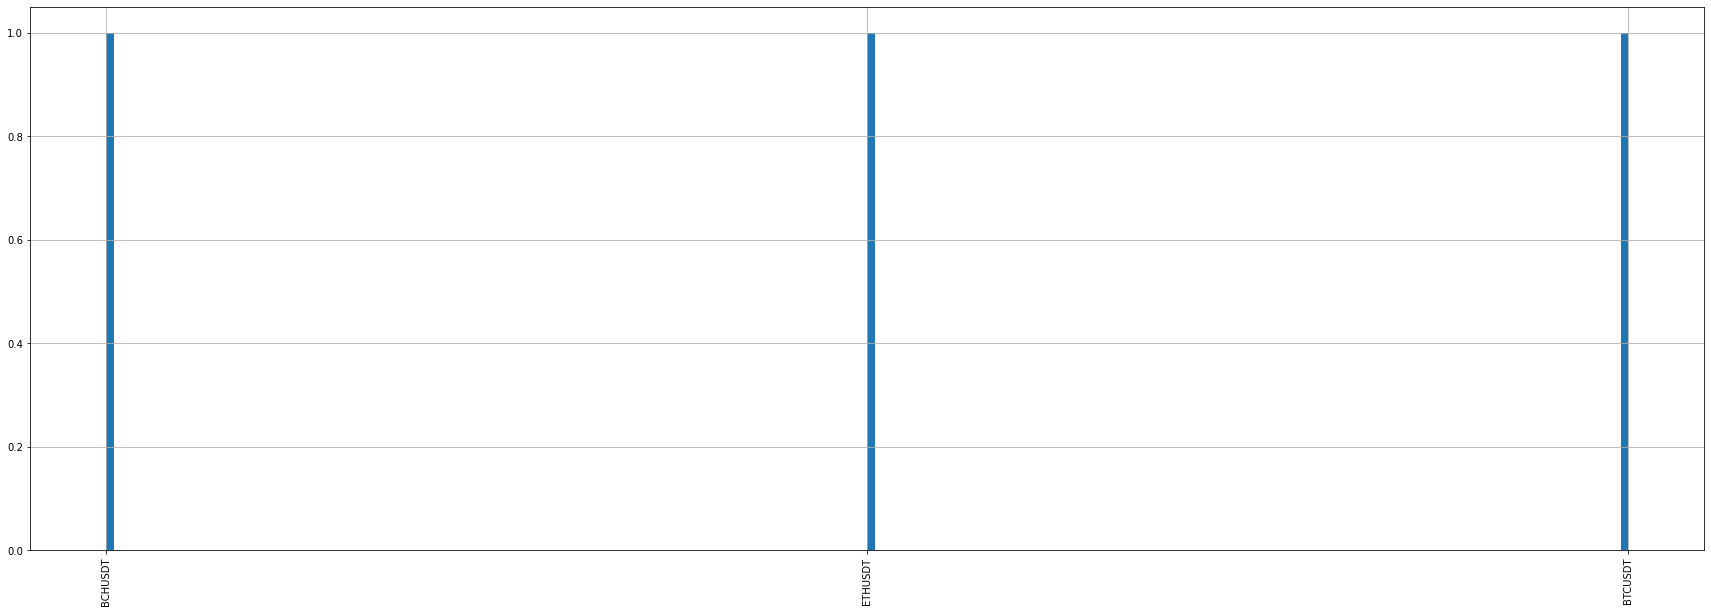

In [ ]:
important_symbol["symbol"].hist(figsize=(30, 10),xrot=90, bins=200,)


In [ ]:
#plt.figure(figsize=(50, 10))
#plt.xticks(rotation=90)
#sns.histplot(data=important_symbol, x="symbol",hue="channel",palette="Set1")


In [ ]:
df[["timeStamp_Tg","message_id","channel_id","date"]]


,timeStamp_Tg,message_id,channel_id,date
0,1598624376,203,-1001381384148,2020-08-28 10:19:36
1,1600081846,281,-1001381384148,2020-09-14 07:10:46
2,1600576224,321,-1001381384148,2020-09-20 00:30:24


In [ ]:
from datetime import timedelta, datetime, time

In [ ]:
#str(datetime(2020,3,1,1,30,0)-h4)
new=datetime.utcfromtimestamp(1647354765)
old=datetime.fromtimestamp(1647354765)

base=(new-old).total_seconds()/60

base

240.0

In [ ]:
import math

In [ ]:
h1=60
math.ceil(base/h1)

4

In [ ]:
h4 = timedelta(hours=4)
h4

datetime.timedelta(seconds=14400)

In [ ]:
df2["datetime"]= pd.to_datetime(df2["timeStamp_Tg"], unit="s")
df2["datetime"]

NameError: name 'df2' is not defined

In [ ]:
df2[["timeStamp_Tg","message_id","channel_id","datetime"]]

,timeStamp_Tg,message_id,channel_id,datetime
0,1647354765,5316,-1001381384148,2022-03-15 14:32:45
1,1646753327,5244,-1001381384148,2022-03-08 15:28:47
2,1646653781,5228,-1001381384148,2022-03-07 11:49:41
3,1645112197,5092,-1001381384148,2022-02-17 15:36:37
4,1645031424,5081,-1001381384148,2022-02-16 17:10:24
...,...,...,...,...
1120,1627603382,97,-1001277174399,2021-07-30 00:03:02
1121,1627583234,95,-1001277174399,2021-07-29 18:27:14
1122,1627543095,88,-1001277174399,2021-07-29 07:18:15
1123,1627410165,66,-1001277174399,2021-07-27 18:22:45


In [ ]:
df2["datetime"]=df2["datetime"].apply(lambda x : x - h4)


In [ ]:
df2[["timeStamp_Tg","message_id","channel_id","datetime"]]

,timeStamp_Tg,message_id,channel_id,datetime
0,1647354765,5316,-1001381384148,2022-03-15 10:32:45
1,1646753327,5244,-1001381384148,2022-03-08 11:28:47
2,1646653781,5228,-1001381384148,2022-03-07 07:49:41
3,1645112197,5092,-1001381384148,2022-02-17 11:36:37
4,1645031424,5081,-1001381384148,2022-02-16 13:10:24
...,...,...,...,...
1120,1627603382,97,-1001277174399,2021-07-29 20:03:02
1121,1627583234,95,-1001277174399,2021-07-29 14:27:14
1122,1627543095,88,-1001277174399,2021-07-29 03:18:15
1123,1627410165,66,-1001277174399,2021-07-27 14:22:45


In [ ]:
if len(data) > 0:  
        old = parser.parse(
            data["timestamp"].iloc[-1]
            )

In [ ]:
if len(data)>0:
    old= parser.parse(
        data["timestamp"].iloc[-1]
    )

In [ ]:
pd.options.display.float_format="{:,.1f}".format
pd.options.display.precision = 1

# Leyendo symbol data

In [ ]:
df_sygnals:pd.DataFrame=pd.read_pickle("../../ONEBTC-5m-data.pickle")
#df_sygnals.to_csv("BTCUSDT-5m-data.csv")

In [ ]:
df_sygnals.columns

Index(['open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av',
       'trades', 'tb_base_av', 'tb_quote_av', 'ignore', 'date_myUTC'],
      dtype='object')

# to day data

In [ ]:
column_time="date_myUTC"
column_value="close"

In [ ]:
df_temp=df_sygnals.copy()
df_temp[column_time]=pd.to_datetime(df_temp[column_time])

In [ ]:
df_temp

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,date_myUTC
timestamp,,,,,,,,,,,,
1574935200000,220.08000000,224.60000000,212.02000000,223.89000000,97.91417000,1574935499999,21582.62825520,54,47.60049000,10568.29626790,0,2019-11-28 06:00:00
1574935500000,218.20000000,219.88000000,216.51000000,218.31000000,163.51701000,1574935799999,35722.63780560,74,33.14081000,7252.34664990,0,2019-11-28 06:05:00
1574935800000,218.74000000,219.15000000,218.22000000,219.14000000,101.86536000,1574936099999,22273.06298530,89,43.08543000,9424.18118300,0,2019-11-28 06:10:00
1574936100000,219.14000000,219.29000000,218.89000000,219.21000000,69.80600000,1574936399999,15299.04845290,46,38.40068000,8416.31182120,0,2019-11-28 06:15:00
1574936400000,219.00000000,219.06000000,218.31000000,218.31000000,154.39611000,1574936699999,33807.72272040,83,14.97611000,3279.27969350,0,2019-11-28 06:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1655054400000,154.80000000,155.10000000,154.80000000,154.90000000,73.26900000,1655054699999,11352.88720000,39,54.02300000,8371.75810000,0,2022-06-12 13:20:00
1655054700000,154.90000000,155.20000000,154.80000000,154.90000000,104.03500000,1655054999999,16117.16550000,63,33.10000000,5132.65410000,0,2022-06-12 13:25:00
1655055000000,154.80000000,154.80000000,154.60000000,154.70000000,106.86500000,1655055299999,16526.90730000,60,75.75500000,11714.66450000,0,2022-06-12 13:30:00


In [ ]:
data_by_day=df_temp.groupby(df_temp[column_time].dt.date,).agg({column_value:['min', 'max', 'first', 'last']} )

In [ ]:
data_by_day=data_by_day[column_value]

In [ ]:
data_by_day.reset_index(inplace=True)

In [ ]:
data_by_day.reset_index(inplace=True)
data_by_day["date_myUTC"]=pd.to_datetime(data_by_day["date_myUTC"])
data_by_day.set_index("date_myUTC",drop=False,inplace=True)

In [ ]:
data_by_day

,date_myUTC,min,max,first,last
date_myUTC,,,,,
2019-11-28,2019-11-28,216.99000000,223.89000000,223.89000000,220.18000000
2019-11-29,2019-11-29,218.77000000,225.81000000,220.21000000,224.27000000
2019-11-30,2019-11-30,210.22000000,223.84000000,223.63000000,211.25000000
2019-12-01,2019-12-01,210.52000000,217.46000000,211.91000000,214.35000000
2019-12-02,2019-12-02,209.81000000,215.71000000,214.16000000,214.39000000
...,...,...,...,...,...
2022-06-08,2022-06-08,175.50000000,182.80000000,176.90000000,176.90000000
2022-06-09,2022-06-09,171.80000000,180.50000000,176.60000000,174.80000000
2022-06-10,2022-06-10,166.00000000,176.20000000,174.90000000,169.00000000


# Restar un dia a un tiempo en especifico

In [ ]:
next_day=data_by_day.iloc[0,0]+timedelta(days=1)

In [ ]:
data_by_day.iloc[0,0].day_name()

'Thursday'

In [ ]:
next_day.day_name()

'Friday'

In [ ]:
datetime.fromisoformat("2020-09-20")-timedelta(days=1)

datetime.datetime(2020, 9, 19, 0, 0)

# Revisando el orden de los tiempos

Efectivamente como el index es timestamp.

In [ ]:
### slice
date_start="2020-09-20 00:30:24"
date_end=pd.to_datetime("2020-05-05 15:45:01")
mask: pd.Series = df_sygnals["date_myUTC"]
mask = mask.between(date_start, date_end)
temp_df_sygnals=df_sygnals[mask]

# Compara los años de cada elemento con el año de la fecha dada
#mask=df_sygnals["date_myUTC"].apply(lambda x : x.year) == date_end.year
#df_sygnals[mask].empty


True

In [ ]:
operate=df.iloc[19,9][3]
operate

IndexError: list index out of range

In [ ]:
df_sygnals.loc[:, ["open", "high", "low", "close"]] = df_sygnals.loc[:, ["open", "high", "low", "close"]].astype(float)
#operate=11030
#mask=mask = (df_sygnals["date_myUTC"] == pd.to_datetime("2022")) #(df_sygnals["high"] >= operate) #| (df_sygnals["low"] <= operate)
mask=(df_sygnals["high"] >= operate) & (df_sygnals["low"] <= operate) & (df_sygnals["date_myUTC"]>="2021-03-05 23:48:46")
mask.sum()
#df_sygnals[mask]["date_myUTC"]

0

In [ ]:
lista=[False,False,2,False,3]

In [ ]:
lista.remove(False)

In [ ]:
lista

[2, False, 3]

# Capturar la eficiencia con los take profit

In [ ]:
dates_profit={
    "0.292": {
      "$date": "2021-09-01T14:50:00Z"
    },
    "0.3": {
      "$date": "2021-09-01T20:30:00Z"
    },
    "0.31": {
      "$date": "2021-09-01T21:30:00Z"
    },
    "0.325": False,
    "0.34": False,
    "0.36": False,
    "0.38": False,
    "0.4": False,
    "0.42": False,
    "0.45": False
  }

In [ ]:
(len(list(dates_profit.values()))-list(dates_profit.values()).count(False))/len(list(dates_profit.values()))

0.3

In [ ]:
3/10

0.3

In [ ]:
df_sygnal_data.iloc[1]#["entry_targets"][1]

NameError: name 'df_sygnal_data' is not defined

In [ ]:
# %%timeit 3.46 ms
mask:pd.Series=BTCUSDT_date["date_myUTC"]
mask=mask.between("2022-03-08","2022-04-08")
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape


(8929, 12)

In [ ]:
# %%timeit 394 ms

mask:pd.Series=BTCUSDT_date["date_myUTC"]
mask=mask.isin(pd.date_range(start="2022-03-08 00:00.00",end=str(BTCUSDT_date["date_myUTC"].iloc[-1]),freq="1s"))
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape


(12305, 12)

In [ ]:
# %%timeit 115 ms

mask:pd.Series=BTCUSDT_date["date_myUTC"]
mask=mask.isin(pd.date_range(start="2022-03-08 00:00.00",end="2022-04-08 00:00.00",freq="1s"))
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape


(8929, 12)

In [ ]:
# %%timeit 4.24 ms
mask=(BTCUSDT_date["date_myUTC"] > 
pd.to_datetime("2022-03-08 00:00.00")) & (BTCUSDT_date["date_myUTC"] <= 
pd.to_datetime("2022-04-08 00:00.00"))
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape

(8928, 12)

In [ ]:
def t(la_t):
    if la_t:
        return "la_t"
    print("aqui toy")
    return "No la_t"

t(True)

'la_t'

In [ ]:
def regresar(row,iterated,returned):
    l=[]
    for row in iterated:
        l.append(returned)
    return l


# Funciones para los df

In [ ]:
def float_ohlcv(df_sygnals):
    df_sygnals2=df_sygnals.copy()
    df_sygnals2[["open","high","low","close"]]=df_sygnals2[["open","high","low","close"]].astype(float)
    return df_sygnals2

def index_time(df_sygnals:pd.DataFrame, column_time:str):
    df_sygnals[column_time]=pd.to_datetime(df_sygnals[column_time])
    df_sygnals.set_index(column_time, drop=False, inplace=True)

def slice_time_for_period(df_sygnals:pd.DataFrame, column_time:str,end_date:str,period:str="1Y"):
    df_sygnals[column_time]=pd.to_datetime(df_sygnals[column_time])
    df_temp=df_sygnals[df_sygnals[column_time]<=end_date].last(period)
    return df_temp

# Probando recorrer filas

In [ ]:
%%timeit
l=[]
l.append(df_sygnal_data.apply(lambda row: row["date"],axis=1))
l

13.2 ms ± 56.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
#for row in df_sygnal_data.itertuples():
#    print(row.date)
regresar(row,df_sygnal_data.itertuples(),row.date)


5.14 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
#for index, row in df_sygnal_data.iterrows():
#    print(row.date)
regresar((index,row),df_sygnal_data.iterrows(),row.date)    

35.4 ms ± 479 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
#for i in range(len(df_sygnal_data)):
#    print(df_sygnal_data.loc[i,"date"])
regresar(i,range(len(df_sygnal_data)),df_sygnal_data.loc[i,"date"])

92.9 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
df_sygnal_data.columns

NameError: name 'df_sygnal_data' is not defined

In [ ]:
df_sygnals.iloc[0,0]
float(df_sygnals.iloc[0,0])

46216.93

In [ ]:
operate=43000
mask=(df_sygnals2["open"])>=operate | (df_sygnals2["high"]>=operate) | (df_sygnals2["low"]>=operate) | (df_sygnals2["close"]>=operate) & df_sygnals2["date_myUTC"].between("2020-03-08","2022-04-08")

lalist:pd.DataFrame= df_sygnals[mask].iloc[0:3][["date_myUTC","open"]]

ladict={k[1]:k[0] for k in lalist.to_dict("split")["data"]}
list(ladict.values())[0]

Timestamp('2021-12-31 20:00:00')

In [ ]:
lalist.sort(reverse=True)
lalist

[Timestamp('2021-12-31 20:10:00'),
 Timestamp('2021-12-31 20:05:00'),
 Timestamp('2021-12-31 20:00:00')]

# Otras pruebas

In [ ]:
l1=[0,1,2,3]
l2=["a","b","c","d"]
d1={}

for i in l1:
    d1[i]=l2[i]

d1

{0: 'a', 1: 'b', 2: 'c', 3: 'd'}

# Leer documentos bases de datos .db con pandas

In [ ]:
import sqlite3
dat=sqlite3.connect("C:/Users/Joan/Downloads/Programa/tradingview.db")

In [ ]:
dat
sqlite3.table

30

In [ ]:
df=pd.read_sql_query("SELECT * FROM tv", dat)

In [ ]:
df[df["exchange"]=='BINANCE']

,screener,exchange,symbol,desc
13484,crypto,BINANCE,ALICEBTC,ALICE / Bitcoin
13488,crypto,BINANCE,MANABTC,Decentraland / Bitcoin
13493,crypto,BINANCE,BURGERUSDT,BURGER / TetherUS
13495,crypto,BINANCE,EPSUSDT,EPS / TetherUS
13499,crypto,BINANCE,RSRBTC,RSR / Bitcoin
...,...,...,...,...
69751,crypto,BINANCE,GALUSDT_PREMIUM,GALUSDT Premium Index
69757,crypto,BINANCE,GALUSD,GAL / US Dollar (calculated by TradingView)
69768,crypto,BINANCE,ASTRBTC,ASTR / Bitcoin
69782,crypto,BINANCE,STEEMUSDT,Steem / TetherUS


In [ ]:
df["exchange"].unique()

array(['NASDAQ', 'NYSE', 'OTC', 'AMEX', 'FX_IDC', 'BINANCE', 'BITFINEX',
       'HITBTC', 'KUCOIN', 'BITTREX', 'KRAKEN', 'COINBASE', 'EXMO',
       'HUOBI', 'BITHUMB', 'BITSTAMP', 'POLONIEX', 'CURRENCYCOMLEV',
       'OKCOIN', 'COINFLOOR', 'KORBIT', 'BYBIT', 'BITKUB', 'CAPITALCOM',
       'GEMINI', 'BITFLYER', 'MERCADO', 'CEXIO', 'BITPANDAPRO',
       'TRADESTATION', 'THEROCKTRADING', 'BITSO', 'BTCYOU', 'IDX', 'NSE',
       'BSE', 'TVC', 'DJ', 'CBOE', 'EURONEXT', 'SIX', 'OANDA', 'OMXCOP',
       'FTSEMYX', 'TWSE', 'BVC', 'OMXVSE', 'OMXSTO', 'FX', 'TSX', 'BME',
       'BIST', 'OMXRSE', 'OMXTSE', 'SZSE', 'HSI', 'SP', 'DFM', 'EGX',
       'BAHRAIN', 'BMV', 'BMFBOVESPA', 'OMXICE', 'ASX', 'TADAWUL', 'XETR',
       'TASE', 'QSE', 'GPW', 'OMXHEX', 'BVL', 'MOEX', 'BCBA', 'BCS',
       'NZX', 'BELEX', 'NYMEX_MINI', 'CME_MINI', 'CBOT', 'NYMEX', 'CME',
       'COMEX', 'ICEUS', 'CBOT_MINI', 'COMEX_MINI', 'EUREX', 'LSE',
       'LSIN', 'CRYPTOCAP', 'FTX', 'HNX', 'HOSE', 'UPCOM', 'JSE', 'SET',
     

In [ ]:
df=pd.read_sql_query("SELECT name FROM sqlite_schema WHERE type='table' ORDER BY name ",dat)


,name
0,tv


# Prueba tradingview

In [ ]:
import tradingview_ta

In [ ]:
from tradingview_ta import TA_Handler, Interval, Exchange

tesla = TA_Handler(
    symbol="TSLA",
    screener="america",
    exchange="NASDAQ",
    interval=Interval.INTERVAL_1_DAY
)
#tesla.add_indicators(["RSI7","VWMA"])
print(tesla.get_analysis().summary)
list(tesla.get_indicators().keys())[40:]

{'RECOMMENDATION': 'SELL', 'BUY': 6, 'SELL': 10, 'NEUTRAL': 10}


['SMA50',
 'EMA100',
 'SMA100',
 'EMA200',
 'SMA200',
 'Rec.Ichimoku',
 'Ichimoku.BLine',
 'Rec.VWMA',
 'VWMA',
 'Rec.HullMA9',
 'HullMA9',
 'Pivot.M.Classic.S3',
 'Pivot.M.Classic.S2',
 'Pivot.M.Classic.S1',
 'Pivot.M.Classic.Middle',
 'Pivot.M.Classic.R1',
 'Pivot.M.Classic.R2',
 'Pivot.M.Classic.R3',
 'Pivot.M.Fibonacci.S3',
 'Pivot.M.Fibonacci.S2',
 'Pivot.M.Fibonacci.S1',
 'Pivot.M.Fibonacci.Middle',
 'Pivot.M.Fibonacci.R1',
 'Pivot.M.Fibonacci.R2',
 'Pivot.M.Fibonacci.R3',
 'Pivot.M.Camarilla.S3',
 'Pivot.M.Camarilla.S2',
 'Pivot.M.Camarilla.S1',
 'Pivot.M.Camarilla.Middle',
 'Pivot.M.Camarilla.R1',
 'Pivot.M.Camarilla.R2',
 'Pivot.M.Camarilla.R3',
 'Pivot.M.Woodie.S3',
 'Pivot.M.Woodie.S2',
 'Pivot.M.Woodie.S1',
 'Pivot.M.Woodie.Middle',
 'Pivot.M.Woodie.R1',
 'Pivot.M.Woodie.R2',
 'Pivot.M.Woodie.R3',
 'Pivot.M.Demark.S1',
 'Pivot.M.Demark.Middle',
 'Pivot.M.Demark.R1',
 'open',
 'P.SAR',
 'BB.lower',
 'BB.upper',
 'AO[2]',
 'volume',
 'change',
 'low',
 'high']

## funciones

In [ ]:
def get_tv_ta_recomendation(symbol:str)-> dict:
    handler=TA_Handler(
        symbol=symbol,
        screener="crypto",
        exchange="BINANCE",
        interval=Interval.INTERVAL_5_MINUTES
    )
    return handler.get_indicators()

In [ ]:
#data_path="C:/Users/Joan/Documents/Programacion/Python/Pasantias/analisis_read_binance/Proyecto/notebooks/sygnals_operations.csv"
df_sygnal_data= pd.read_csv("sygnals_operations.csv")

In [ ]:
df_sygnal_data=df_sygnal_data.iloc[:5]
df_recomendation= []
for i in range(len(df_sygnal_data)):
    print(f"""i:{i} --- symbol:{df_sygnal_data.loc[i,"symbol"]}""")
    dict_recomendation=get_tv_ta_recomendation(df_sygnal_data.loc[i,"symbol"])
    df_recomendation.append(dict_recomendation)

In [ ]:
dict_recomendation=get_tv_ta_recomendation(df_sygnal_data.loc[0,"symbol"])

In [ ]:
dict_recomendation

{'RECOMMENDATION': 'SELL', 'BUY': 2, 'SELL': 13, 'NEUTRAL': 11}

# Probando pandas_ta

In [ ]:
import pandas_ta as ta

In [ ]:
df_sygnals=pd.read_pickle("../../ATOMBTC-5m-data.pickle")

In [ ]:
df_sygnals=float_ohlcv(df_sygnals=df_sygnals)

Para copiar las recomendaciones de trading view revisar:

- Trading view compute: https://github.com/brian-the-dev/python-tradingview-ta/blob/main/tradingview_ta/technicals.py

- Trading view clasification: https://github.com/brian-the-dev/python-tradingview-ta/blob/main/tradingview_ta/main.py

In [ ]:
# OSCCILATORS
#rsi
df_sygnals.ta.rsi() # need a RSI1
df_sygnals.ta.rsi(length=5) # is RSI1

#stoch
df_sygnals.ta.stoch() # need a stk1 and a std1
df_sygnals.ta.stoch().iloc[-2] # the before value are stk1 and std1

#CCI 20 and CCI 201 (this is the before value of CCI 20)
cci=pd.concat(
    [df_sygnals.ta.cci(length=20).iloc[-1],df_sygnals.ta.cci(length=20).iloc[-2]],axis=1)
cci
#ADX (14)
# need an adxpdi1, adxndi1
df_sygnals.ta.adx(length=14,).iloc[-1:,:], df_sygnals.ta.adx(length=14,).iloc[-2,1:] #the before value is adxpdi1, adxndi1
#AO
df_sygnals.ta.ao().iloc[-1],df_sygnals.ta.ao().iloc[-2],df_sygnals.ta.ao().iloc[-3] # THE BEFORE DATA IS ao1, ao2

NameError: name 'df_sygnals' is not defined

Ya que 5 min es una temporalidad muy baja lo mejor seria es aplicar la recomendacion a una temporalidad de 1 día. con el fin de predecir la tendencia sobre esta temporalidad.

In [ ]:
def ta_rsi_14_5(df_sygnals):
    df_sygnals=pd.concat([df_sygnals,df_sygnals.ta.rsi(length=14),
    df_sygnals.ta.rsi(length=5)], axis=1)
    return df_sygnals
def ta_stoch(df_sygnals):
    df_sygnals=pd.concat([df_sygnals,df_sygnals.ta.stoch()], axis=1)
    return df_sygnals
def ta_cci20(df_sygnals):
    df_sygnals=pd.concat([df_sygnals,df_sygnals.ta.cci(length=20)], axis=1)
    return df_sygnals
def ta_adx(df_sygnals):
    df_sygnals=pd.concat([df_sygnals,df_sygnals.ta.adx(length=14)], axis=1)
    return df_sygnals
def ta_ao(df_sygnals):
    df_sygnals=pd.concat([df_sygnals,df_sygnals.ta.ao()], axis=1)
    return df_sygnals

def ta_all_occillators(df_sygnals):
    df_sygnals=ta_adx(df_sygnals)
    df_sygnals=ta_rsi_14_5(df_sygnals)
    df_sygnals=ta_ao(df_sygnals)
    df_sygnals=ta_cci20(df_sygnals)
    df_sygnals=ta_stoch(df_sygnals)
    return df_sygnals


In [ ]:
tv=get_tv_ta_recomendation("ATOMBTC")
tv['AO'],tv['AO[1]'],tv['AO[2]']


#tv.keys()

(-6.2e-07, -2.6e-07, 2e-07)

In [ ]:
df_sygnals=pd.read_pickle("../../ATOMBTC-5m-data.pickle")
df_sygnals=float_ohlcv(df_sygnals=df_sygnals)
df_sygnals.ta.ao().iloc[-5:], df_sygnals.ta.ao().iloc[-6:] # need a RSI1


(timestamp
 1653901200000    1.000588e-06
 1653901500000    5.758824e-07
 1653901800000    1.805882e-07
 1653902100000   -2.814706e-07
 1653902400000   -6.632353e-07
 Name: AO_5_34, dtype: float64,
 timestamp
 1653900900000    1.335882e-06
 1653901200000    1.000588e-06
 1653901500000    5.758824e-07
 1653901800000    1.805882e-07
 1653902100000   -2.814706e-07
 1653902400000   -6.632353e-07
 Name: AO_5_34, dtype: float64)

# Funciones recomendacionde TV_TA pero usando pandas_ta

In [ ]:
# Tradingview Technical Analysis (tradingview-ta)
# Author: deathlyface (https://github.com/deathlyface)
# License: MIT

import requests, json, datetime, warnings
from .technicals import Compute

__version__ = "3.2.10"

class Analysis(object):
    exchange = ""
    symbol = ""
    screener = ""
    time = ""
    interval = ""
    summary = {}
    oscillators = {}
    moving_averages = {}
    indicators = {}

class Interval:
    INTERVAL_1_MINUTE = "1m"
    INTERVAL_5_MINUTES = "5m"
    INTERVAL_15_MINUTES = "15m"
    INTERVAL_30_MINUTES = "30m"
    INTERVAL_1_HOUR = "1h"
    INTERVAL_2_HOURS = "2h"
    INTERVAL_4_HOURS = "4h"
    INTERVAL_1_DAY = "1d"
    INTERVAL_1_WEEK = "1W"
    INTERVAL_1_MONTH = "1M"

class Exchange:
    FOREX = "FX_IDC"
    CFD = "TVC"


class TradingView:
    # Note: Please DO NOT modify the order or DELETE existing indicators, it will break the technical analysis. You may APPEND custom indicator to the END of the list.
    indicators = ["Recommend.Other","Recommend.All","Recommend.MA","RSI","RSI[1]","Stoch.K","Stoch.D","Stoch.K[1]","Stoch.D[1]","CCI20","CCI20[1]","ADX","ADX+DI","ADX-DI","ADX+DI[1]","ADX-DI[1]","AO","AO[1]","Mom","Mom[1]","MACD.macd","MACD.signal","Rec.Stoch.RSI","Stoch.RSI.K","Rec.WR","W.R","Rec.BBPower","BBPower","Rec.UO","UO","close","EMA5","SMA5","EMA10","SMA10","EMA20","SMA20","EMA30","SMA30","EMA50","SMA50","EMA100","SMA100","EMA200","SMA200","Rec.Ichimoku","Ichimoku.BLine","Rec.VWMA","VWMA","Rec.HullMA9","HullMA9","Pivot.M.Classic.S3","Pivot.M.Classic.S2","Pivot.M.Classic.S1","Pivot.M.Classic.Middle","Pivot.M.Classic.R1","Pivot.M.Classic.R2","Pivot.M.Classic.R3","Pivot.M.Fibonacci.S3","Pivot.M.Fibonacci.S2","Pivot.M.Fibonacci.S1","Pivot.M.Fibonacci.Middle","Pivot.M.Fibonacci.R1","Pivot.M.Fibonacci.R2","Pivot.M.Fibonacci.R3","Pivot.M.Camarilla.S3","Pivot.M.Camarilla.S2","Pivot.M.Camarilla.S1","Pivot.M.Camarilla.Middle","Pivot.M.Camarilla.R1","Pivot.M.Camarilla.R2","Pivot.M.Camarilla.R3","Pivot.M.Woodie.S3","Pivot.M.Woodie.S2","Pivot.M.Woodie.S1","Pivot.M.Woodie.Middle","Pivot.M.Woodie.R1","Pivot.M.Woodie.R2","Pivot.M.Woodie.R3","Pivot.M.Demark.S1","Pivot.M.Demark.Middle","Pivot.M.Demark.R1", "open", "P.SAR", "BB.lower", "BB.upper", "AO[2]", "volume", "change", "low", "high", "Stoch.RSI.D"]

    scan_url = "https://scanner.tradingview.com/"

    def data(symbols, interval, indicators):
        """Format TradingView's Scanner Post Data
        Args:
            symbols (list): List of EXCHANGE:SYMBOL (ex: ["NASDAQ:AAPL"] or ["BINANCE:BTCUSDT"])
            interval (string): Time Interval (ex: 1m, 5m, 15m, 1h, 4h, 1d, 1W, 1M)
        Returns:
            string: JSON object as a string.
        """
        if interval == "1m":
            # 1 Minute
            data_interval = "|1"
        elif interval == "5m":
            # 5 Minutes
            data_interval = "|5"
        elif interval == "15m":
            # 15 Minutes
            data_interval = "|15"
        elif interval == "30m":
            # 30 Minutes
            data_interval = "|30"
        elif interval == "1h":
            # 1 Hour
            data_interval = "|60"
        elif interval == "2h":
            # 2 Hours
            data_interval = "|120"
        elif interval == "4h":
            # 4 Hour
            data_interval = "|240"
        elif interval == "1W":
            # 1 Week
            data_interval = "|1W"
        elif interval == "1M":
            # 1 Month
            data_interval = "|1M"
        else:
            if interval != '1d':
                warnings.warn("Interval is empty or not valid, defaulting to 1 day.")
            # Default, 1 Day
            data_interval = ""

        data_json = {"symbols":{"tickers":[symbol.upper() for symbol in symbols],"query":{"types":[]}},"columns":[x + data_interval for x in indicators]}

        return data_json

def calculate(indicators, indicators_key, screener, symbol, exchange, interval):
    oscillators_counter, ma_counter = {"BUY": 0, "SELL": 0, "NEUTRAL": 0}, {"BUY": 0, "SELL": 0, "NEUTRAL": 0}
    computed_oscillators, computed_ma = {}, {}

    indicators = list(indicators.values())

    # RECOMMENDATIONS
    if None not in indicators[0:2]:
        recommend_oscillators = Compute.Recommend(indicators[0])
        recommend_summary = Compute.Recommend(indicators[1])
        recommend_moving_averages = Compute.Recommend(indicators[2])
    else:
        return None

    # OSCILLATORS
    # RSI (14)
    if None not in indicators[3:5]:
        computed_oscillators["RSI"] = Compute.RSI(indicators[3], indicators[4])
        oscillators_counter[computed_oscillators["RSI"]] += 1
    # Stoch %K
    if None not in indicators[5:9]:
        computed_oscillators["STOCH.K"] = Compute.Stoch(indicators[5], indicators[6], indicators[7], indicators[8])
        oscillators_counter[computed_oscillators["STOCH.K"]] += 1
    # CCI (20)
    if None not in indicators[9:11]:
        computed_oscillators["CCI"] = Compute.CCI20(indicators[9], indicators[10])
        oscillators_counter[computed_oscillators["CCI"]] += 1
    # ADX (14)
    if None not in indicators[11:16]:
        computed_oscillators["ADX"] = Compute.ADX(indicators[11], indicators[12], indicators[13], indicators[14], indicators[15])
        oscillators_counter[computed_oscillators["ADX"]] += 1
    # AO
    if None not in indicators[16:18] and indicators[86] != None:
        computed_oscillators["AO"] = Compute.AO(indicators[16], indicators[17], indicators[86])
        oscillators_counter[computed_oscillators["AO"]] += 1
    # Mom (10)
    if None not in indicators[18:20]:
        computed_oscillators["Mom"] = Compute.Mom(indicators[18], indicators[19])
        oscillators_counter[computed_oscillators["Mom"]] += 1
    # MACD
    if None not in indicators[20:22]:
        computed_oscillators["MACD"] = Compute.MACD(indicators[20], indicators[21])
        oscillators_counter[computed_oscillators["MACD"]] += 1
    # Stoch RSI
    if indicators[22] != None:
        computed_oscillators["Stoch.RSI"] = Compute.Simple(indicators[22])
        oscillators_counter[computed_oscillators["Stoch.RSI"]] += 1
    # W%R
    if indicators[24] != None:
        computed_oscillators["W%R"] = Compute.Simple(indicators[24])
        oscillators_counter[computed_oscillators["W%R"]] += 1
    # BBP
    if indicators[26] != None:
        computed_oscillators["BBP"] = Compute.Simple(indicators[26])
        oscillators_counter[computed_oscillators["BBP"]] += 1
    # UO
    if indicators[28] != None:
        computed_oscillators["UO"] = Compute.Simple(indicators[28])
        oscillators_counter[computed_oscillators["UO"]] += 1

    # MOVING AVERAGES
    ma_list = ["EMA10","SMA10","EMA20","SMA20","EMA30","SMA30","EMA50","SMA50","EMA100","SMA100","EMA200","SMA200"]
    close = indicators[30]
    ma_list_counter = 0
    for index in range(33, 45):
        if indicators[index] != None:
            computed_ma[ma_list[ma_list_counter]] = Compute.MA(indicators[index], close)
            ma_counter[computed_ma[ma_list[ma_list_counter]]] += 1
            ma_list_counter += 1

    # MOVING AVERAGES, pt 2
    # ICHIMOKU
    if indicators[45] != None:
        computed_ma["Ichimoku"] = Compute.Simple(indicators[45])
        ma_counter[computed_ma["Ichimoku"]] += 1
    # VWMA
    if indicators[47] != None:
        computed_ma["VWMA"] = Compute.Simple(indicators[47])
        ma_counter[computed_ma["VWMA"]] += 1
    # HullMA (9)
    if indicators[49] != None:
        computed_ma["HullMA"] = Compute.Simple(indicators[49])
        ma_counter[computed_ma["HullMA"]] += 1

    analysis = Analysis()
    analysis.screener = screener
    analysis.exchange = exchange
    analysis.symbol = symbol
    analysis.interval = interval
    analysis.time = datetime.datetime.now()

    for x in range(len(indicators)):
        analysis.indicators[indicators_key[x]] = indicators[x]

    analysis.indicators = analysis.indicators.copy()

    analysis.oscillators = {"RECOMMENDATION": recommend_oscillators, "BUY": oscillators_counter["BUY"], "SELL": oscillators_counter["SELL"], "NEUTRAL": oscillators_counter["NEUTRAL"], "COMPUTE": computed_oscillators}
    analysis.moving_averages = {"RECOMMENDATION": recommend_moving_averages, "BUY": ma_counter["BUY"], "SELL": ma_counter["SELL"], "NEUTRAL": ma_counter["NEUTRAL"], "COMPUTE": computed_ma}
    analysis.summary = {"RECOMMENDATION": recommend_summary, "BUY": oscillators_counter["BUY"] + ma_counter["BUY"], "SELL": oscillators_counter["SELL"] + ma_counter["SELL"], "NEUTRAL": oscillators_counter["NEUTRAL"] + ma_counter["NEUTRAL"]}

    return analysis

class TA_Handler(object):
    screener = ""
    exchange = ""
    symbol = ""
    interval = ""
    timeout = None

    indicators = TradingView.indicators.copy()

    def __init__(self, screener="", exchange="", symbol="", interval="", timeout=None, proxies=None):
        """Create an instance of TA_Handler class
        Args:
            screener (str, required): Screener (see documentation and tradingview's site).
            exchange (str, required): Exchange (see documentation and tradingview's site).
            symbol (str, required): Abbreviation of a stock or currency (see documentation and tradingview's site).
            interval (str, optional): See the interval class and the documentation. Defaults to 1 day.
            timeout (float, optional): Timeout for requests (in seconds). Defaults to None.
            proxies (dict, optional): Proxies to be used for requests. Defaults to None (disabled).
        """
        self.screener = screener
        self.exchange = exchange
        self.symbol = symbol
        self.interval = interval
        self.timeout = timeout
        self.proxies = proxies

    # Set functions
    def set_screener_as_stock(self, country):
        """Set the screener as a country (for stocks).
        Args:
            country (string): Stock's country (ex: If NFLX or AAPL, then "america" is the screener)
        """
        self.screener = country

    def set_screener_as_crypto(self):
        """Set the screener as crypto (for cryptocurrencies).
        """
        self.screener = "crypto"

    def set_screener_as_cfd(self):
        """Set the screener as cfd (contract for differences).
        """
        self.screener = "cfd"

    def set_screener_as_forex(self):
        """Set the screener as forex.
        """
        self.screener = "forex"

    def set_exchange_as_crypto_or_stock(self, exchange):
        """Set the exchange
        Args:
            exchange (string): Stock/Crypto's exchange (NASDAQ, NYSE, BINANCE, BITTREX, etc).
        """
        self.exchange = exchange

    def set_exchange_as_forex(self):
        """Set the exchange as FX_IDC for forex.
        """
        self.exchange = "FX_IDC"

    def set_exchange_as_cfd(self):
        """Set the exchange as TVC for cfd.
        """
        self.exchange = "TVC"

    def set_interval_as(self, intvl):
        """Set the interval.
        Refer to: https://python-tradingview-ta.readthedocs.io/en/latest/usage.html#setting-the-interval
        Args:
            intvl (string): interval. You can use values from the Interval class.
        """
        self.interval = intvl

    def set_symbol_as(self, symbol):
        """Set the symbol.
        Refer to: https://python-tradingview-ta.readthedocs.io/en/latest/usage.html#setting-the-symbol
        Args:
            symbol (string): abbreviation of a stock or currency (ex: NFLX, AAPL, BTCUSD).
        """
        self.symbol = symbol

    def get_indicators(self, indicators=[]):
        """Just the indicators, please. See valid indicators on https://pastebin.com/1DjWv2Hd.
        Args:
            indicators (list, optional): List of string of indicators (ex: ["RSI7", "open"]). Defaults to self.indicators.
        Returns:
            dict: A dictionary with a format of {"indicator": value}.
        """
        if len(indicators) == 0:
            indicators = self.indicators

        if self.screener == "" or type(self.screener) != str:
            raise Exception("Screener is empty or not valid.")
        elif self.exchange == "" or type(self.exchange) != str:
            raise Exception("Exchange is empty or not valid.")
        elif self.symbol == "" or type(self.symbol) != str:
            raise Exception("Symbol is empty or not valid.")

        exchange_symbol = f"{self.exchange}:{self.symbol}"
        data = TradingView.data([exchange_symbol], self.interval, indicators)
        scan_url = f"{TradingView.scan_url}{self.screener.lower()}/scan"
        headers = {"User-Agent": "tradingview_ta/{}".format(__version__)}
        response = requests.post(scan_url,json=data, headers=headers, timeout=self.timeout, proxies=self.proxies)

        # Return False if can't get data
        if response.status_code != 200:
            raise Exception("Can't access TradingView's API. HTTP status code: {}. Check for invalid symbol, exchange, or indicators.".format(response.status_code))

        result = json.loads(response.text)["data"]
        if result != []:
            indicators_val = {}
            for x in range(len(indicators)):
                indicators_val[indicators[x]] = result[0]["d"][x]
            return indicators_val
        else:
            raise Exception("Exchange or symbol not found.")

    # Add custom indicators
    def add_indicators(self, indicators):
        """Add custom indicators. See valid indicators on https://pastebin.com/1DjWv2Hd.
        Args:
            indicators (list): List of strings of indicators. (ex: ["RSI7", "VWMA"])
        """
        self.indicators += indicators

    # Get analysis
    def get_analysis(self):
        """Get analysis from TradingView and compute it.
        Returns:
            Analysis: Contains information about the analysis.
        """

        return calculate(indicators=self.get_indicators(), indicators_key=self.indicators, screener=self.screener, symbol=self.symbol, exchange=self.exchange, interval=self.interval)

def get_multiple_analysis(screener, interval, symbols, additional_indicators=[], timeout=None, proxies=None):
    """Retrieve multiple technical analysis at once. Note: You can't mix different screener and interval
    Args:
        screener (str, required): Screener (see documentation and tradingview's site).
        interval (str, optional): See the interval class and the documentation. Defaults to 1 day.
        symbols (list, required): List of exchange and ticker symbol separated by a colon. Example: ["NASDAQ:TSLA", "NYSE:DOCN"] or ["BINANCE:BTCUSDT", "BITSTAMP:ETHUSD"].
        additional_indicators (list, optional): List of additional indicators to be requested from TradingView, see valid indicators on https://pastebin.com/1DjWv2Hd.
        timeout (float, optional): Timeout for requests (in seconds). Defaults to None.
        proxies (dict, optional): Proxies to be used for requests. Defaults to None (disabled).
    Returns:
        dict: dictionary with a format of {"EXCHANGE:SYMBOL": Analysis}.
    """
    if screener == "" or type(screener) != str:
        raise Exception("Screener is empty or not valid.")
    if len(symbols) == 0 or type(symbols) != list:
        raise Exception("Symbols is empty or not valid.")
    for symbol in symbols:
        if len(symbol.split(":")) != 2 or "" in symbol.split(":"):
            raise Exception("One or more symbol is invalid. Symbol should be a list of exchange and ticker symbol separated by a colon. Example: [\"NASDAQ:TSLA\", \"NYSE:DOCN\"] or [\"BINANCE:BTCUSDT\", \"BITSTAMP:ETHUSD\"].")

    indicators_key = TradingView.indicators.copy()

    if additional_indicators:
        indicators_key += additional_indicators

    data = TradingView.data(symbols, interval, indicators_key)
    scan_url = f"{TradingView.scan_url}{screener.lower()}/scan"
    headers = {"User-Agent": "tradingview_ta/{}".format(__version__)}
    response = requests.post(scan_url,json=data, headers=headers, timeout=timeout, proxies=proxies)

    result = json.loads(response.text)["data"]
    final = {}

    for analysis in result:
        # Convert list to dict
        indicators = {}
        for x in range(len(analysis["d"])):
            indicators[indicators_key[x]] = analysis["d"][x]

        final[analysis["s"]] = calculate(indicators=indicators, indicators_key=indicators_key, screener=screener, symbol=analysis["s"].split(":")[1], exchange=analysis["s"].split(":")[0], interval=interval)

    for symbol in symbols:
        # Add None if there is no analysis for symbol
        if symbol.upper() not in final:
            final[symbol.upper()] = None

    return final

In [ ]:
# Tradingview Technical Analysis (tradingview-ta)
# Author: deathlyface (https://github.com/deathlyface)
# Rewritten from https://www.tradingview.com/static/bundles/technicals.f2e6e6a51aebb6cd46f8.js
# License: MIT

class Recommendation:
    buy = "BUY"
    strong_buy = "STRONG_BUY"
    sell = "SELL"
    strong_sell = "STRONG_SELL"
    neutral = "NEUTRAL"
    error = "ERROR"

class Compute:
    def MA(ma, close):
        """Compute Moving Average
        Args:
            ma (float): MA value
            close (float): Close value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (ma < close):
            return Recommendation.buy
        elif (ma > close):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def RSI(rsi, rsi1):
        """Compute Relative Strength Index
        Args:
            rsi (float): RSI value
            rsi1 (float): RSI[1] value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (rsi < 30 and rsi1 < rsi):
            return Recommendation.buy
        elif (rsi > 70 and rsi1 > rsi):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def Stoch(k, d, k1, d1):
        """Compute Stochastic
        Args:
            k (float): Stoch.K value
            d (float): Stoch.D value
            k1 (float): Stoch.K[1] value
            d1 (float): Stoch.D[1] value
        Returns:.
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (k < 20 and d < 20 and k > d and k1 < d1):
            return Recommendation.buy
        elif (k > 80 and d > 80 and k < d and k1 > d1):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def CCI20(cci20, cci201):
        """Compute Commodity Channel Index 20
        Args:
            cci20 (float): CCI20 value
            cci201 ([type]): CCI20[1] value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (cci20 < -100 and cci20 > cci201):
            return Recommendation.buy
        elif (cci20 > 100 and cci20 < cci201):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def ADX(adx, adxpdi, adxndi, adxpdi1, adxndi1):
        """Compute Average Directional Index
        Args:
            adx (float): ADX value
            adxpdi (float): ADX+DI value
            adxndi (float): ADX-DI value
            adxpdi1 (float): ADX+DI[1] value
            adxndi1 (float): ADX-DI[1] value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (adx > 20 and adxpdi1 < adxndi1 and adxpdi > adxndi):
            return Recommendation.buy
        elif (adx > 20 and adxpdi1 > adxndi1 and adxpdi < adxndi):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def AO(ao, ao1, ao2):
        """Compute Awesome Oscillator
        Args:
            ao (float): AO value
            ao1 (float): AO[1] value
            ao2 (float): AO[2] value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (ao > 0 and ao1 < 0) or (ao > 0 and ao1 > 0 and ao > ao1 and ao2 > ao1):
            return Recommendation.buy
        elif (ao < 0 and ao1 > 0) or (ao < 0 and ao1 < 0 and ao < ao1 and ao2 < ao1):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def Mom(mom, mom1):
        """Compute Momentum
        Args:
            mom (float): Mom value
            mom1 (float): Mom[1] value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (mom < mom1):
            return Recommendation.sell
        elif (mom > mom1):
            return Recommendation.buy
        else:
            return Recommendation.neutral

    def MACD(macd, signal):
        """Compute Moving Average Convergence/Divergence
        Args:
            macd (float): MACD.macd value
            signal (float): MACD.signal value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (macd > signal):
            return Recommendation.buy
        elif (macd < signal):
            return Recommendation.sell
        else:
            return Recommendation.neutral
        
    def BBBuy(close, bblower):
        """Compute Bull Bear Buy
        Args:
            close (float): close value
            bblower (float): BB.lower value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (close < bblower):
            return Recommendation.buy
        else:
            return Recommendation.neutral

    def BBSell(close, bbupper):
        """Compute Bull Bear Sell
        Args:
            close (float): close value
            bbupper (float): BB.upper value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (close > bbupper):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def PSAR(psar, open):
        """Compute Parabolic Stop-And-Reverse
        Args:
            psar (float): P.SAR value
            open (float): open value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (psar < open):
            return Recommendation.buy
        elif (psar > open):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def Recommend(value):
        """Compute Recommend
        Args:
            value (float): recommend value
        Returns:
            string: "STRONG_BUY", "BUY", "NEUTRAL", "SELL", "STRONG_SELL", or "ERROR"
        """
        if value >= -1 and value < -.5:
            return Recommendation.strong_sell
        elif value >= -.5 and value < -.1:
            return Recommendation.sell
        elif value >= -.1 and value <= .1:
            return Recommendation.neutral
        elif value > .1 and value <= .5 :
            return Recommendation.buy
        elif value > .5 and value <= 1:
            return Recommendation.strong_buy
        else:
            return Recommendation.error

    def Simple(value):
        """Compute Simple
        Args:
            value (float): Rec.X value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (value == -1):
            return Recommendation.sell
        elif (value == 1):
            return Recommendation.buy
        else:
            return Recommendation.neutral

# My compute

In [ ]:
class Recommendation:
    buy = "long"
    strong_buy = "STRONG_BUY"
    sell = "short"
    strong_sell = "STRONG_SELL"
    neutral = "NEUTRAL"
    error = "ERROR"

class Compute:
    _df_sygnals=None

    def __init__(self,df_sygnals:pd.DataFrame):
        self._df_sygnals=ta_all_occillators(df_sygnals)

    def RSI(self)-> dict:
        """Compute Relative Strength Index
        Args:
            rsi (float): RSI value
            rsi1 (float): RSI[1] value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if self._df_sygnals.columns.isin(["RSI_5","RSI_14"]).max():
            rsi= self._df_sygnals.RSI_14.iloc[-1]
            rsi1=self._df_sygnals.RSI_5.iloc[-1]

            if (rsi < 30 and rsi1 < rsi):
                recomendation= Recommendation.buy
            elif (rsi > 70 and rsi1 > rsi):
                recomendation= Recommendation.sell
            else:
                recomendation= Recommendation.neutral

            return {"RSI":recomendation}
        
        return {"RSI":np.nan}

    def Stoch(self) -> dict:
        """Compute Stochastic
        Args:
            k (float): Stoch.K value
            d (float): Stoch.D value
            k1 (float): Stoch.K[1] value
            d1 (float): Stoch.D[1] value
        Returns:.
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if self._df_sygnals.columns.isin(['STOCHk_14_3_3', 'STOCHd_14_3_3']).max():
            
            d= self._df_sygnals['STOCHd_14_3_3'].iloc[-1]
            d1= self._df_sygnals['STOCHd_14_3_3'].iloc[-2]
            k= self._df_sygnals['STOCHk_14_3_3'].iloc[-1]
            k1= self._df_sygnals['STOCHk_14_3_3'].iloc[-2]

            if (k < 20 and d < 20 and k > d and k1 < d1):
                recomendation= Recommendation.buy
            elif (k > 80 and d > 80 and k < d and k1 > d1):
                recomendation= Recommendation.sell
            else:
                recomendation= Recommendation.neutral
            
            return {"Stoch":recomendation}
        
        return {"Stoch":np.nan}

    def CCI20(self):
        """Compute Commodity Channel Index 20
        Args:
            cci20 (float): CCI20 value
            cci201 ([type]): CCI20[1] value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if self._df_sygnals.columns.isin(['CCI_20_0.015']).max():
            
            cci20= self._df_sygnals['CCI_20_0.015'].iloc[-1]
            cci201= self._df_sygnals['CCI_20_0.015'].iloc[-2]
            
            if (cci20 < -100 and cci20 > cci201):
                recomendation= Recommendation.buy
            elif (cci20 > 100 and cci20 < cci201):
                recomendation= Recommendation.sell
            else:
                recomendation= Recommendation.neutral
            return {"CCI20":recomendation}
        
        return {"CCI20":np.nan}

    def ADX(self):
        """Compute Average Directional Index
        Args:
            adx (float): ADX value
            adxpdi (float): ADX+DI value
            adxndi (float): ADX-DI value
            adxpdi1 (float): ADX+DI[1] value
            adxndi1 (float): ADX-DI[1] value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if self._df_sygnals.columns.isin(['ADX_14','DMP_14', 'DMN_14']).max():
            
            adx= self._df_sygnals['ADX_14'].iloc[-1]
            adxpdi= self._df_sygnals['DMP_14'].iloc[-1]
            adxpdi1= self._df_sygnals['DMP_14'].iloc[-2]
            adxndi= self._df_sygnals['DMN_14'].iloc[-1]
            adxndi1= self._df_sygnals['DMN_14'].iloc[-2]

            if (adx > 20 and adxpdi1 < adxndi1 and adxpdi > adxndi):
                recomendation= Recommendation.buy
            elif (adx > 20 and adxpdi1 > adxndi1 and adxpdi < adxndi):
                recomendation= Recommendation.sell
            else:
                recomendation= Recommendation.neutral
            return {"ADX":recomendation}
        
        return {"ADX":np.nan}

    def AO(self):
        """Compute Awesome Oscillator
        Args:
            ao (float): AO value
            ao1 (float): AO[1] value
            ao2 (float): AO[2] value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """

        if self._df_sygnals.columns.isin(['AO_5_34']).max():
                      
            ao= self._df_sygnals['AO_5_34'].iloc[-1]
            ao1= self._df_sygnals['AO_5_34'].iloc[-2]
            ao2= self._df_sygnals['AO_5_34'].iloc[-3]

            if (ao > 0 and ao1 < 0) or (ao > 0 and ao1 > 0 and ao > ao1 and ao2 > ao1):
                recomendation= Recommendation.buy
            elif (ao < 0 and ao1 > 0) or (ao < 0 and ao1 < 0 and ao < ao1 and ao2 < ao1):
                recomendation= Recommendation.sell
            else:
                recomendation= Recommendation.neutral
            return {"AO":recomendation}
        
        return {"AO":np.nan}

    def all_occillators(self) -> dict:
        d={}
        #occs=[self.AO(),self.RSI(),self.ADX(), self.CCI20(),self.Stoch()]
        occs=[self.AO(),self.RSI(),self.ADX(), self.CCI20(),self.Stoch()]
        for occ in occs:
            pop=occ.popitem()
            d[pop[0]]=pop[1]
        return d

In [ ]:
Compute(df_sygnals).all_occillators()

{'AO': 'NEUTRAL',
 'RSI': 'NEUTRAL',
 'ADX': 'NEUTRAL',
 'CCI20': 'NEUTRAL',
 'Stoch': 'NEUTRAL'}

In [ ]:
d1={"a":1}
d2={"b":2}
d3={"c":3}

In [ ]:
d_all={}

In [ ]:
item=d1.popitem()

In [ ]:
d1.items()

dict_items([('a', 1)])

In [ ]:
a

In [ ]:
d_all[d1.keys()]=d1.values()

TypeError: unhashable type: 'dict_keys'

In [ ]:
d_all

{0: {}}

# tareas de la funcion

- Cortar el df de hasta el día de la publicación. (listo en practica el time slice)
- Calcular los obciladores.()
- aplicar el compute.
- actualizar base de datos.

# Practica el time slice

In [ ]:
df_sygnals=pd.read_pickle("../../ATOMBTC-5m-data.pickle")
df_sygnals=float_ohlcv(df_sygnals=df_sygnals)

In [ ]:
df_sygnals["date_myUTC"]=pd.to_datetime(df_sygnals["date_myUTC"])

## slice for a day and a year before

In [ ]:
df_sygnals

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,date_myUTC
timestamp,,,,,,,,,,,,
1556510400000,0.001000,0.001000,0.000768,0.000781,367946.18000000,1556510699999,293.61974406,4010,216652.29000000,173.44620958,0,2019-04-29 00:00:00
1556510700000,0.000781,0.000795,0.000759,0.000759,129047.92000000,1556510999999,100.90405454,1534,53596.74000000,42.03260282,0,2019-04-29 00:05:00
1556511000000,0.000765,0.000794,0.000755,0.000787,99500.90000000,1556511299999,76.56797881,1155,60061.80000000,46.29875461,0,2019-04-29 00:10:00
1556511300000,0.000787,0.000817,0.000782,0.000800,119708.49000000,1556511599999,95.84929119,1937,83905.36000000,67.14451640,0,2019-04-29 00:15:00
1556511600000,0.000803,0.000804,0.000792,0.000792,37329.56000000,1556511899999,29.82775618,460,19170.07000000,15.32883606,0,2019-04-29 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1653901200000,0.000335,0.000335,0.000334,0.000334,1122.45000000,1653901499999,0.37558466,45,325.50000000,0.10893350,0,2022-05-30 05:00:00
1653901500000,0.000334,0.000334,0.000334,0.000334,897.53000000,1653901799999,0.29959850,40,254.22000000,0.08489966,0,2022-05-30 05:05:00
1653901800000,0.000334,0.000334,0.000333,0.000334,34.30000000,1653902099999,0.01143553,16,13.26000000,0.00442227,0,2022-05-30 05:10:00


In [ ]:
#betwen without date time index
df_sygnals.between_time("2019-01-29","2019-04-29")

TypeError: Index must be DatetimeIndex

In [ ]:
#without date time index
df_sygnals["date_myUTC"]=="2019-04-29 00:05:00" 

timestamp
1556510400000    False
1556510700000     True
1556511000000    False
1556511300000    False
1556511600000    False
                 ...  
1653901200000    False
1653901500000    False
1653901800000    False
1653902100000    False
1653902400000    False
Name: date_myUTC, Length: 323915, dtype: bool

In [ ]:
#without date time index
df_sygnals["date_myUTC"].between_time("2019-01-29","2019-04-29")

TypeError: Index must be DatetimeIndex

In [ ]:
#without date time index
df_sygnals["date_myUTC"].at_time("2019-04-29")

TypeError: Index must be DatetimeIndex

In [ ]:
index_time(df_sygnals,"date_myUTC")

In [ ]:
df_sygnals.at_time("2021")

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,date_myUTC
date_myUTC,,,,,,,,,,,,
2019-04-29,0.001000,0.001000,0.000768,0.000781,367946.18000000,1556510699999,293.61974406,4010,216652.29000000,173.44620958,0,2019-04-29
2019-04-30,0.000741,0.000741,0.000732,0.000732,6266.81000000,1556597099999,4.60783381,124,1356.03000000,0.99974782,0,2019-04-30
2019-05-01,0.000770,0.000770,0.000766,0.000766,2565.15000000,1556683499999,1.97047315,45,1055.76000000,0.81210631,0,2019-05-01
2019-05-02,0.000796,0.000797,0.000795,0.000796,214.21000000,1556769899999,0.17034796,18,62.21000000,0.04949718,0,2019-05-02
2019-05-03,0.000860,0.000866,0.000858,0.000862,10264.16000000,1556856299999,8.84102933,192,4548.64000000,3.92122688,0,2019-05-03
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-26,0.000363,0.000363,0.000362,0.000362,177.07000000,1653537899999,0.06416212,17,76.87000000,0.02784936,0,2022-05-26
2022-05-27,0.000325,0.000325,0.000324,0.000324,501.27000000,1653624299999,0.16254610,34,67.58000000,0.02193140,0,2022-05-27
2022-05-28,0.000327,0.000327,0.000325,0.000325,1434.61000000,1653710699999,0.46808788,82,319.12000000,0.10418476,0,2022-05-28


## La mejor forma de filtrar por periodos de tiempo

In [ ]:
# indica hasta que fecha quieres llegar y aplicas last para decirle que corte un periodo de tiempo antes.
df_sygnals[df_sygnals["date_myUTC"]<="2019-05-29"].last("1H")

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,date_myUTC
date_myUTC,,,,,,,,,,,,
2019-05-28 23:05:00,0.000538,0.000540,0.000538,0.000539,655.59000000,1559099399999,0.35358144,19,562.76000000,0.30357366,0,2019-05-28 23:05:00
2019-05-28 23:10:00,0.000539,0.000539,0.000538,0.000538,692.88000000,1559099699999,0.37317866,9,28.79000000,0.01549980,0,2019-05-28 23:10:00
2019-05-28 23:15:00,0.000538,0.000539,0.000538,0.000538,886.57000000,1559099999999,0.47725804,22,849.48000000,0.45729639,0,2019-05-28 23:15:00
2019-05-28 23:20:00,0.000539,0.000539,0.000538,0.000538,260.16000000,1559100299999,0.14007010,10,57.98000000,0.03121681,0,2019-05-28 23:20:00
2019-05-28 23:25:00,0.000538,0.000539,0.000538,0.000538,103.63000000,1559100599999,0.05578720,6,4.59000000,0.00247354,0,2019-05-28 23:25:00
2019-05-28 23:30:00,0.000539,0.000540,0.000539,0.000540,435.51000000,1559100899999,0.23486711,8,435.51000000,0.23486711,0,2019-05-28 23:30:00
2019-05-28 23:35:00,0.000540,0.000541,0.000539,0.000539,1494.45000000,1559101199999,0.80673491,47,475.36000000,0.25674843,0,2019-05-28 23:35:00
2019-05-28 23:40:00,0.000540,0.000543,0.000539,0.000543,701.78000000,1559101499999,0.37990739,31,441.48000000,0.23903816,0,2019-05-28 23:40:00
2019-05-28 23:45:00,0.000543,0.000544,0.000541,0.000544,1062.10000000,1559101799999,0.57626468,37,364.41000000,0.19789342,0,2019-05-28 23:45:00


In [ ]:
df_sygnals.first("2Y")

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,date_myUTC
date_myUTC,,,,,,,,,,,,
2019-04-29 00:00:00,0.001000,0.001000,0.000768,0.000781,367946.18000000,1556510699999,293.61974406,4010,216652.29000000,173.44620958,0,2019-04-29 00:00:00
2019-04-29 00:05:00,0.000781,0.000795,0.000759,0.000759,129047.92000000,1556510999999,100.90405454,1534,53596.74000000,42.03260282,0,2019-04-29 00:05:00
2019-04-29 00:10:00,0.000765,0.000794,0.000755,0.000787,99500.90000000,1556511299999,76.56797881,1155,60061.80000000,46.29875461,0,2019-04-29 00:10:00
2019-04-29 00:15:00,0.000787,0.000817,0.000782,0.000800,119708.49000000,1556511599999,95.84929119,1937,83905.36000000,67.14451640,0,2019-04-29 00:15:00
2019-04-29 00:20:00,0.000803,0.000804,0.000792,0.000792,37329.56000000,1556511899999,29.82775618,460,19170.07000000,15.32883606,0,2019-04-29 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 23:40:00,0.000185,0.000185,0.000185,0.000185,875.02000000,1609386299999,0.16182166,16,143.15000000,0.02651135,0,2020-12-30 23:40:00
2020-12-30 23:45:00,0.000185,0.000185,0.000183,0.000183,1264.90000000,1609386599999,0.23255194,26,269.16000000,0.04935010,0,2020-12-30 23:45:00
2020-12-30 23:50:00,0.000183,0.000183,0.000183,0.000183,1210.76000000,1609386899999,0.22144868,16,147.54000000,0.02702406,0,2020-12-30 23:50:00


# Probando el ta_recomendation

In [ ]:
df_sygnals=pd.read_pickle("../../ATOMBTC-5m-data.pickle")
df_sygnals=float_ohlcv(df_sygnals=df_sygnals)
index_time(df_sygnals, "date_myUTC")

In [ ]:
ta_rsi_14_5(df_sygnals)

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,date_myUTC,RSI_14,RSI_5
date_myUTC,,,,,,,,,,,,,,
2019-04-29 00:00:00,0.001000,0.001000,0.000768,0.000781,367946.18000000,1556510699999,293.61974406,4010,216652.29000000,173.44620958,0,2019-04-29 00:00:00,NaN,NaN
2019-04-29 00:05:00,0.000781,0.000795,0.000759,0.000759,129047.92000000,1556510999999,100.90405454,1534,53596.74000000,42.03260282,0,2019-04-29 00:05:00,NaN,NaN
2019-04-29 00:10:00,0.000765,0.000794,0.000755,0.000787,99500.90000000,1556511299999,76.56797881,1155,60061.80000000,46.29875461,0,2019-04-29 00:10:00,NaN,NaN
2019-04-29 00:15:00,0.000787,0.000817,0.000782,0.000800,119708.49000000,1556511599999,95.84929119,1937,83905.36000000,67.14451640,0,2019-04-29 00:15:00,NaN,NaN
2019-04-29 00:20:00,0.000803,0.000804,0.000792,0.000792,37329.56000000,1556511899999,29.82775618,460,19170.07000000,15.32883606,0,2019-04-29 00:20:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-30 05:00:00,0.000335,0.000335,0.000334,0.000334,1122.45000000,1653901499999,0.37558466,45,325.50000000,0.10893350,0,2022-05-30 05:00:00,46.916104,19.950555
2022-05-30 05:05:00,0.000334,0.000334,0.000334,0.000334,897.53000000,1653901799999,0.29959850,40,254.22000000,0.08489966,0,2022-05-30 05:05:00,43.956019,15.626228
2022-05-30 05:10:00,0.000334,0.000334,0.000333,0.000334,34.30000000,1653902099999,0.01143553,16,13.26000000,0.00442227,0,2022-05-30 05:10:00,43.956019,15.626228


In [ ]:
ta_rsi(df_sygnals)

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,date_myUTC,RSI_14,RSI_5
date_myUTC,,,,,,,,,,,,,,
2021-12-31 05:25:00,0.000656,0.000656,0.000655,0.000655,383.74000000,1640942999999,0.25152811,60,164.94000000,0.10813163,0,2021-12-31 05:25:00,NaN,NaN
2021-12-31 05:30:00,0.000656,0.000656,0.000654,0.000654,398.22000000,1640943299999,0.26054831,75,274.95000000,0.17989817,0,2021-12-31 05:30:00,NaN,NaN
2021-12-31 05:35:00,0.000654,0.000656,0.000654,0.000654,162.67000000,1640943599999,0.10644890,42,94.69000000,0.06197427,0,2021-12-31 05:35:00,NaN,NaN
2021-12-31 05:40:00,0.000654,0.000654,0.000652,0.000653,348.83000000,1640943899999,0.22780072,53,196.15000000,0.12809888,0,2021-12-31 05:40:00,NaN,NaN
2021-12-31 05:45:00,0.000652,0.000654,0.000652,0.000654,499.74000000,1640944199999,0.32624123,43,204.11000000,0.13330833,0,2021-12-31 05:45:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-30 05:00:00,0.000335,0.000335,0.000334,0.000334,1122.45000000,1653901499999,0.37558466,45,325.50000000,0.10893350,0,2022-05-30 05:00:00,46.916104,19.950555
2022-05-30 05:05:00,0.000334,0.000334,0.000334,0.000334,897.53000000,1653901799999,0.29959850,40,254.22000000,0.08489966,0,2022-05-30 05:05:00,43.956019,15.626228
2022-05-30 05:10:00,0.000334,0.000334,0.000333,0.000334,34.30000000,1653902099999,0.01143553,16,13.26000000,0.00442227,0,2022-05-30 05:10:00,43.956019,15.626228


In [ ]:
df_sygnals=slice_time_for_period(df_sygnals,"date_myUTC","2022-05-30 05:20:00","1Y") # Es necesario que sea exactamente el tiempo de el dato usado.

In [ ]:
df_sygnals.columns.isin(['RSI_16']).max()

False

In [ ]:
df_sygnals=ta_all_occillators(df_sygnals)
df_sygnals.columns

Index(['open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av',
       'trades', 'tb_base_av', 'tb_quote_av', 'ignore', 'date_myUTC', 'ADX_14',
       'DMP_14', 'DMN_14', 'RSI_14', 'RSI_5', 'AO_5_34', 'CCI_20_0.015',
       'STOCHk_14_3_3', 'STOCHd_14_3_3'],
      dtype='object')

In [ ]:
#compute
#rsi=df_sygnals.RSI_14.iloc[-1]
#rsi1=df_sygnals.RSI_5.iloc[-1]
Compute(df_sygnals).RSI()

{'RSI': 'NEUTRAL'}

In [ ]:
Compute(df_sygnals).all_occillators()

{'AO': 'NEUTRAL'}

# capturando el dia de publicacion

In [ ]:
date=df["date"][1]

In [ ]:
date.day_name()

'Monday'